# Analyzing my Amazon Halo Workout Data

I try to consolidate the number of times I have to import packages. Everything I need should be in the first code block.

In [561]:
import pandas as pd
import numpy as np
from sklearn import metrics
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings 
warnings.filterwarnings('ignore')

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import xml.etree.ElementTree as ET

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm
from scipy import stats
sns.set()

rs = 123

I need to read my halo workout data in as a pandas dataframe

In [562]:
amazon_data = pd.read_csv(r'C:\Users\coleb\OneDrive\Corel\Datasets\Amazon Health Data\Activity\Activity_Workouts_1970-01-01--2022-04-24_a4815fda-80a6-4513-bfe3-638c2c6acf13.csv')

In [563]:
amazon_data.head(15)

,Start Time,End Time,Session Type,Session Subtype,Creation Method,Local Time Zone Offset,Activity Score,Intense Duration (ms),Moderate Duration (ms),Max Heart Rate (bpm),Average Heart Rate (bpm),Steps,Calories,Software Version,Software OS,Software OS Version,Active Time (ms),Total Duration (ms),Activity Pause
0,2022-04-23T05:57:36.270Z,2022-04-23T06:29:02.484Z,WORKOUT,RUNNING,Automatic,-5.0,58.061175000000006,1620000.0,242484.0,145.0,134.0,4585.0,470.0,1.0.107826,ios,15.4,1886214.0,1886214.0,Not Applicable
1,2022-04-22T04:25:46.584Z,2022-04-22T04:57:41.491Z,WORKOUT,RUNNING,Automatic,-5.0,57.74151666666666,1620000.0,221491.0,144.0,130.0,4626.0,455.0,1.0.107826,ios,15.4,1914907.0,1914907.0,Not Applicable
2,2022-04-21T12:59:00.000Z,2022-04-21T13:27:00.000Z,WORKOUT,OTHER,Automatic,-5.0,23.2,No Data,1380000.0,115.0,98.0,1124.0,176.0,1.0.107826,ios,15.4,1680000.0,1680000.0,Not Applicable
3,2022-04-21T12:23:29.044Z,2022-04-21T12:58:35.262Z,WORKOUT,RUNNING,Automatic,-5.0,63.713496666666664,1860000.0,95262.0,173.0,150.0,4952.0,616.0,1.0.107826,ios,15.4,2106218.0,2106218.0,Not Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,2022-04-03T17:00:51.274Z,2022-04-03T17:44:09.296Z,WORKOUT,WALKING,Automatic,-4.0,38.45318,60000.0,2168726.0,136.0,112.0,4404.0,491.0,1.0.106045,ios,15.4,2598022.0,2598022.0,Not Applicable
12,2022-04-03T16:44:00.000Z,2022-04-03T17:07:00.000Z,WORKOUT,OTHER,Automatic,-4.0,21.15,180000.0,900000.0,161.0,113.0,1566.0,195.0,1.0.106045,ios,15.4,1380000.0,1380000.0,Not Applicable
13,2022-04-03T15:20:03.046Z,2022-04-03T16:28:35.501Z,WORKOUT,RUNNING,Automatic,-4.0,132.54091666666667,3840000.0,272455.0,174.0,159.0,10553.0,1317.0,1.0.106045,ios,15.4,4112455.0,4112455.0,Not Applicable
14,2022-04-03T01:06:29.875Z,2022-04-03T01:55:50.011Z,WORKOUT,WALKING,Automatic,-4.0,3.0751041666666667,No Data,60000.0,101.0,77.0,3131.0,283.0,1.0.106045,ios,15.4,2960136.0,2960136.0,Not Applicable


In [564]:
#create a workable copy of the dataset
df = amazon_data

In [565]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Start Time                231 non-null    object 
 1   End Time                  231 non-null    object 
 2   Session Type              231 non-null    object 
 3   Session Subtype           231 non-null    object 
 4   Creation Method           231 non-null    object 
 5   Local Time Zone Offset    231 non-null    float64
 6   Activity Score            231 non-null    object 
 7   Intense Duration (ms)     231 non-null    object 
 8   Moderate Duration (ms)    231 non-null    object 
 9   Max Heart Rate (bpm)      231 non-null    float64
 10  Average Heart Rate (bpm)  231 non-null    float64
 11  Steps                     231 non-null    float64
 12  Calories                  231 non-null    float64
 13  Software Version          231 non-null    object 
 14  Software O

<AxesSubplot:xlabel='Start Time'>

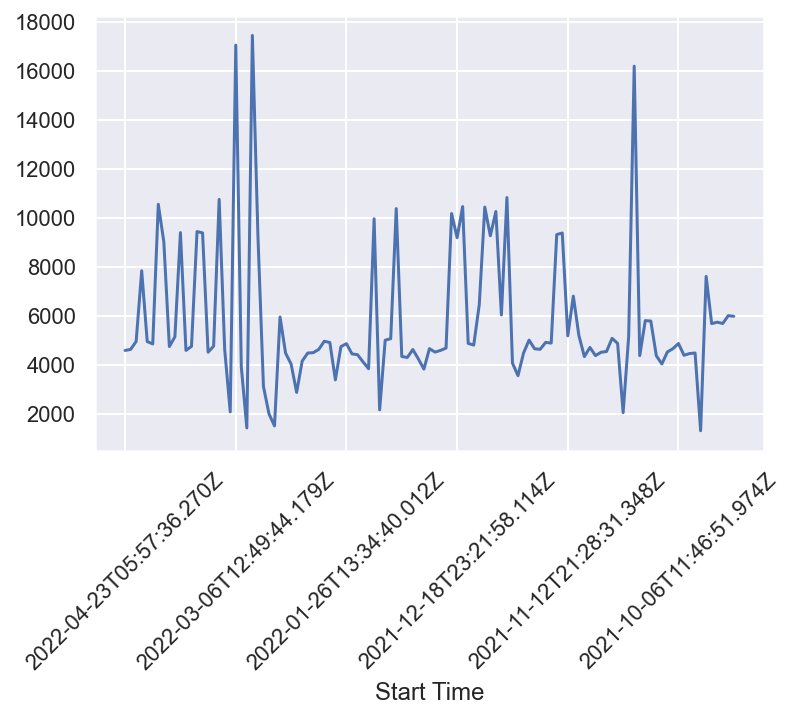

In [566]:
# show data with a mask filter (running only)
#I want to plot the old time to check my work later
mask1 = df['Session Subtype'] == 'RUNNING'
(
    df[mask1]
    .set_index('Start Time')
    ['Steps']
    .plot(rot = 45)
)

In [567]:
df.head(4)

,Start Time,End Time,Session Type,Session Subtype,Creation Method,Local Time Zone Offset,Activity Score,Intense Duration (ms),Moderate Duration (ms),Max Heart Rate (bpm),Average Heart Rate (bpm),Steps,Calories,Software Version,Software OS,Software OS Version,Active Time (ms),Total Duration (ms),Activity Pause
0,2022-04-23T05:57:36.270Z,2022-04-23T06:29:02.484Z,WORKOUT,RUNNING,Automatic,-5.0,58.061175000000006,1620000.0,242484.0,145.0,134.0,4585.0,470.0,1.0.107826,ios,15.4,1886214.0,1886214.0,Not Applicable
1,2022-04-22T04:25:46.584Z,2022-04-22T04:57:41.491Z,WORKOUT,RUNNING,Automatic,-5.0,57.74151666666666,1620000.0,221491.0,144.0,130.0,4626.0,455.0,1.0.107826,ios,15.4,1914907.0,1914907.0,Not Applicable
2,2022-04-21T12:59:00.000Z,2022-04-21T13:27:00.000Z,WORKOUT,OTHER,Automatic,-5.0,23.2,No Data,1380000.0,115.0,98.0,1124.0,176.0,1.0.107826,ios,15.4,1680000.0,1680000.0,Not Applicable
3,2022-04-21T12:23:29.044Z,2022-04-21T12:58:35.262Z,WORKOUT,RUNNING,Automatic,-5.0,63.713496666666664,1860000.0,95262.0,173.0,150.0,4952.0,616.0,1.0.107826,ios,15.4,2106218.0,2106218.0,Not Applicable


## Converting Time

In [568]:
#I will use the datetime and pytz packages to convert my time/dates
from datetime import datetime
from pytz import timezone
import pytz
central = timezone('US/Central')
time_stamp = '2022-04-23T05:57:36.270Z'
published_time = datetime.strptime(time_stamp, '%Y-%m-%dT%H:%M:%S.%f%z')
published_cst = published_time.astimezone(central)
actual_time_published = published_cst.strftime('%a, %b %d %Y at %I:%M:%S %p %Z')

print(time_stamp)
print(published_time)
print(published_cst)
print(actual_time_published)

2022-04-23T05:57:36.270Z
2022-04-23 05:57:36.270000+00:00
2022-04-23 00:57:36.270000-05:00
Sat, Apr 23 2022 at 12:57:36 AM CDT


In [593]:
list(map(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.%f%z').strftime('%a, %b %d %Y at %I:%M:%S %p %Z'), df['Start Time']))
pd.to_datetime(df['Start Time'], format='%Y-%m-%dT%H:%M:%S.%f%z')


def date_convert(date_to_convert):
     return datetime.strptime(date_to_convert,
                                       '%Y-%m-%dT%H:%M:%S.%f%z').strftime('%a, %b %d %Y at %I:%M:%S %p %Z')

df['Local Start Time'] = df['Start Time'].apply(date_convert)
df.head(2)

,Start Time,End Time,Session Type,Session Subtype,Creation Method,Local Time Zone Offset,Activity Score,Intense Duration (ms),Moderate Duration (ms),Max Heart Rate (bpm),...,Active Time (ms),Total Duration (ms),Activity Pause,Local Start Time,Local End Time,Active Time (sec),Active Time (min),Active Time (hour),Active Time (total min),Miles
0,2022-04-23T05:57:36.270Z,2022-04-23T06:29:02.484Z,WORKOUT,RUNNING,Automatic,-5.0,58.061175000000006,1620000.0,242484.0,145.0,...,1886214.0,1886214.0,Not Applicable,"Sat, Apr 23 2022 at 05:57:36 AM UTC","Sat, Apr 23 2022 at 06:29:02 AM UTC",26.21,31.44,0.52,31.44,3.11
1,2022-04-22T04:25:46.584Z,2022-04-22T04:57:41.491Z,WORKOUT,RUNNING,Automatic,-5.0,57.74151666666666,1620000.0,221491.0,144.0,...,1914907.0,1914907.0,Not Applicable,"Fri, Apr 22 2022 at 04:25:46 AM UTC","Fri, Apr 22 2022 at 04:57:41 AM UTC",54.91,31.92,0.53,31.92,3.14


In [594]:
list(map(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.%f%z').strftime('%a, %b %d %Y at %I:%M:%S %p %Z'), df['End Time']))
pd.to_datetime(df['End Time'], format='%Y-%m-%dT%H:%M:%S.%f%z')


def date_convert(date_to_convert):
     return datetime.strptime(date_to_convert,
                                       '%Y-%m-%dT%H:%M:%S.%f%z').strftime('%a, %b %d %Y at %I:%M:%S %p %Z')

In [595]:
# import pytz
# df['Local_Time'] = df.apply(lambda x: pytz.timezone("US/Central" if df['Time_Zone'] == 'CST' else x['Time_Zone']).normalize(x['CREATED_DT']), axis = 1)

In [596]:
#I want to pull just the day out of the start/end times
df['Local Start Time DTG'] = pd.to_datetime(df['Local Start Time'])
df['day_of_week_start']=df['Local Start Time DTG'].dt.day_name()
df['Local End Time DTG'] = pd.to_datetime(df['Local End Time'])
df['day_of_week_end']=df['Local End Time DTG'].dt.day_name()

In [597]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Start Time                231 non-null    object             
 1   End Time                  231 non-null    object             
 2   Session Type              231 non-null    object             
 3   Session Subtype           231 non-null    object             
 4   Creation Method           231 non-null    object             
 5   Local Time Zone Offset    231 non-null    float64            
 6   Activity Score            231 non-null    object             
 7   Intense Duration (ms)     231 non-null    object             
 8   Moderate Duration (ms)    231 non-null    object             
 9   Max Heart Rate (bpm)      231 non-null    float64            
 10  Average Heart Rate (bpm)  231 non-null    float64            
 11  Steps              

In [598]:
#some of my numbers are string objects so I need to convert them to floats
df['Activity Score'] = pd.to_numeric(df['Activity Score'],errors='coerce')
df['Intense Duration (ms)'] = pd.to_numeric(df['Intense Duration (ms)'],errors='coerce')
df['Moderate Duration (ms)'] = pd.to_numeric(df['Moderate Duration (ms)'],errors='coerce')

In [599]:
#I want the entire dataframe to be rounded to 2 places
df = df.round(2)

In [600]:
#check my work
df.head(2)

,Start Time,End Time,Session Type,Session Subtype,Creation Method,Local Time Zone Offset,Activity Score,Intense Duration (ms),Moderate Duration (ms),Max Heart Rate (bpm),...,Local End Time,Active Time (sec),Active Time (min),Active Time (hour),Active Time (total min),Miles,Local Start Time DTG,day_of_week_start,Local End Time DTG,day_of_week_end
0,2022-04-23T05:57:36.270Z,2022-04-23T06:29:02.484Z,WORKOUT,RUNNING,Automatic,-5.0,58.06,1620000.0,242484.0,145.0,...,"Sat, Apr 23 2022 at 06:29:02 AM UTC",26.21,31.44,0.52,31.44,3.11,2022-04-23 05:57:36+00:00,Saturday,2022-04-23 06:29:02+00:00,Saturday
1,2022-04-22T04:25:46.584Z,2022-04-22T04:57:41.491Z,WORKOUT,RUNNING,Automatic,-5.0,57.74,1620000.0,221491.0,144.0,...,"Fri, Apr 22 2022 at 04:57:41 AM UTC",54.91,31.92,0.53,31.92,3.14,2022-04-22 04:25:46+00:00,Friday,2022-04-22 04:57:41+00:00,Friday


In [601]:
df.columns

Index(['Start Time', 'End Time', 'Session Type', 'Session Subtype',
       'Creation Method', 'Local Time Zone Offset', 'Activity Score',
       'Intense Duration (ms)', 'Moderate Duration (ms)',
       'Max Heart Rate (bpm)', 'Average Heart Rate (bpm)', 'Steps', 'Calories',
       'Software Version', 'Software OS', 'Software OS Version',
       'Active Time (ms)', 'Total Duration (ms)', 'Activity Pause',
       'Local Start Time', 'Local End Time', 'Active Time (sec)',
       'Active Time (min)', 'Active Time (hour)', 'Active Time (total min)',
       'Miles', 'Local Start Time DTG', 'day_of_week_start',
       'Local End Time DTG', 'day_of_week_end'],
      dtype='object')

In [602]:
#I want to re-arrange my columns so I can focus on the important items.
df = df[['Session Subtype', 'Activity Score', 'Intense Duration (ms)',
         'Moderate Duration (ms)','Active Time (ms)', 'Average Heart Rate (bpm)',
         'Max Heart Rate (bpm)','Steps', 'Calories',
         'Total Duration (ms)', 'Local Start Time DTG', 'Local End Time DTG',
         'day_of_week_start', 'day_of_week_end', 'Local Start Time', 'Local End Time']]

In [603]:
#double check that I have all my columns still
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Session Subtype           231 non-null    object             
 1   Activity Score            230 non-null    float64            
 2   Intense Duration (ms)     124 non-null    float64            
 3   Moderate Duration (ms)    206 non-null    float64            
 4   Active Time (ms)          231 non-null    float64            
 5   Average Heart Rate (bpm)  231 non-null    float64            
 6   Max Heart Rate (bpm)      231 non-null    float64            
 7   Steps                     231 non-null    float64            
 8   Calories                  231 non-null    float64            
 9   Total Duration (ms)       231 non-null    float64            
 10  Local Start Time DTG      231 non-null    datetime64[ns, UTC]
 11  Local End Time DTG 

## MS to Minutes and Seconds

In [604]:
df.head(2)

,Session Subtype,Activity Score,Intense Duration (ms),Moderate Duration (ms),Active Time (ms),Average Heart Rate (bpm),Max Heart Rate (bpm),Steps,Calories,Total Duration (ms),Local Start Time DTG,Local End Time DTG,day_of_week_start,day_of_week_end,Local Start Time,Local End Time
0,RUNNING,58.06,1620000.0,242484.0,1886214.0,134.0,145.0,4585.0,470.0,1886214.0,2022-04-23 05:57:36+00:00,2022-04-23 06:29:02+00:00,Saturday,Saturday,"Sat, Apr 23 2022 at 05:57:36 AM UTC","Sat, Apr 23 2022 at 06:29:02 AM UTC"
1,RUNNING,57.74,1620000.0,221491.0,1914907.0,130.0,144.0,4626.0,455.0,1914907.0,2022-04-22 04:25:46+00:00,2022-04-22 04:57:41+00:00,Friday,Friday,"Fri, Apr 22 2022 at 04:25:46 AM UTC","Fri, Apr 22 2022 at 04:57:41 AM UTC"


In [605]:
#seconds = (milliseconds / 1000) % 60 ;
#minutes = ((milliseconds / (1000*60)) % 60);
#hours   = ((milliseconds / (1000*60*60)) % 24);
df['Active Time (sec)'] = (df['Active Time (ms)'] / 1000) % 60
df['Active Time (min)'] = (df['Active Time (ms)'] / (1000*60)) % 60
df['Active Time (hour)'] = (df['Active Time (ms)'] / (1000*60*60) % 24)
df['Active Time (total min)'] = (df['Active Time (ms)'] / (1000*60))    

In [606]:
df = df.round(2)
df.info()
df.head(18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Session Subtype           231 non-null    object             
 1   Activity Score            230 non-null    float64            
 2   Intense Duration (ms)     124 non-null    float64            
 3   Moderate Duration (ms)    206 non-null    float64            
 4   Active Time (ms)          231 non-null    float64            
 5   Average Heart Rate (bpm)  231 non-null    float64            
 6   Max Heart Rate (bpm)      231 non-null    float64            
 7   Steps                     231 non-null    float64            
 8   Calories                  231 non-null    float64            
 9   Total Duration (ms)       231 non-null    float64            
 10  Local Start Time DTG      231 non-null    datetime64[ns, UTC]
 11  Local End Time DTG 

,Session Subtype,Activity Score,Intense Duration (ms),Moderate Duration (ms),Active Time (ms),Average Heart Rate (bpm),Max Heart Rate (bpm),Steps,Calories,Total Duration (ms),Local Start Time DTG,Local End Time DTG,day_of_week_start,day_of_week_end,Local Start Time,Local End Time,Active Time (sec),Active Time (min),Active Time (hour),Active Time (total min)
0,RUNNING,58.06,1620000.0,242484.0,1886214.0,134.0,145.0,4585.0,470.0,1886214.0,2022-04-23 05:57:36+00:00,2022-04-23 06:29:02+00:00,Saturday,Saturday,"Sat, Apr 23 2022 at 05:57:36 AM UTC","Sat, Apr 23 2022 at 06:29:02 AM UTC",26.21,31.44,0.52,31.44
1,RUNNING,57.74,1620000.0,221491.0,1914907.0,130.0,144.0,4626.0,455.0,1914907.0,2022-04-22 04:25:46+00:00,2022-04-22 04:57:41+00:00,Friday,Friday,"Fri, Apr 22 2022 at 04:25:46 AM UTC","Fri, Apr 22 2022 at 04:57:41 AM UTC",54.91,31.92,0.53,31.92
2,OTHER,23.20,NaN,1380000.0,1680000.0,98.0,115.0,1124.0,176.0,1680000.0,2022-04-21 12:59:00+00:00,2022-04-21 13:27:00+00:00,Thursday,Thursday,"Thu, Apr 21 2022 at 12:59:00 PM UTC","Thu, Apr 21 2022 at 01:27:00 PM UTC",0.00,28.00,0.47,28.00
3,RUNNING,63.71,1860000.0,95262.0,2106218.0,150.0,173.0,4952.0,616.0,2106218.0,2022-04-21 12:23:29+00:00,2022-04-21 12:58:35+00:00,Thursday,Thursday,"Thu, Apr 21 2022 at 12:23:29 PM UTC","Thu, Apr 21 2022 at 12:58:35 PM UTC",6.22,35.10,0.59,35.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,WALKING,3.08,NaN,60000.0,2960136.0,77.0,101.0,3131.0,283.0,2960136.0,2022-04-03 01:06:29+00:00,2022-04-03 01:55:50+00:00,Sunday,Sunday,"Sun, Apr 03 2022 at 01:06:29 AM UTC","Sun, Apr 03 2022 at 01:55:50 AM UTC",20.14,49.34,0.82,49.34
15,WALKING,1.27,NaN,NaN,1739493.0,65.0,96.0,2315.0,122.0,1739493.0,2022-04-03 00:25:30+00:00,2022-04-03 00:54:29+00:00,Sunday,Sunday,"Sun, Apr 03 2022 at 12:25:30 AM UTC","Sun, Apr 03 2022 at 12:54:29 AM UTC",59.49,28.99,0.48,28.99
16,WALKING,0.53,NaN,NaN,694057.0,72.0,87.0,723.0,47.0,694057.0,2022-04-02 22:52:51+00:00,2022-04-02 23:04:25+00:00,Saturday,Saturday,"Sat, Apr 02 2022 at 10:52:51 PM UTC","Sat, Apr 02 2022 at 11:04:25 PM UTC",34.06,11.57,0.19,11.57
17,RUNNING,113.87,3240000.0,347738.0,3674029.0,138.0,148.0,9022.0,968.0,3674029.0,2022-04-02 07:19:33+00:00,2022-04-02 08:20:47+00:00,Saturday,Saturday,"Sat, Apr 02 2022 at 07:19:33 AM UTC","Sat, Apr 02 2022 at 08:20:47 AM UTC",14.03,1.23,1.02,61.23


In [607]:
#I plan on joining this with my Map My Run Data to get the mileage, so I will pull just the date
df['Workout_Date'] = pd.to_datetime(df['Local Start Time DTG']).dt.date

In [608]:
df.info()
df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Session Subtype           231 non-null    object             
 1   Activity Score            230 non-null    float64            
 2   Intense Duration (ms)     124 non-null    float64            
 3   Moderate Duration (ms)    206 non-null    float64            
 4   Active Time (ms)          231 non-null    float64            
 5   Average Heart Rate (bpm)  231 non-null    float64            
 6   Max Heart Rate (bpm)      231 non-null    float64            
 7   Steps                     231 non-null    float64            
 8   Calories                  231 non-null    float64            
 9   Total Duration (ms)       231 non-null    float64            
 10  Local Start Time DTG      231 non-null    datetime64[ns, UTC]
 11  Local End Time DTG 

,Session Subtype,Activity Score,Intense Duration (ms),Moderate Duration (ms),Active Time (ms),Average Heart Rate (bpm),Max Heart Rate (bpm),Steps,Calories,Total Duration (ms),...,Local End Time DTG,day_of_week_start,day_of_week_end,Local Start Time,Local End Time,Active Time (sec),Active Time (min),Active Time (hour),Active Time (total min),Workout_Date
0,RUNNING,58.06,1620000.0,242484.0,1886214.0,134.0,145.0,4585.0,470.0,1886214.0,...,2022-04-23 06:29:02+00:00,Saturday,Saturday,"Sat, Apr 23 2022 at 05:57:36 AM UTC","Sat, Apr 23 2022 at 06:29:02 AM UTC",26.21,31.44,0.52,31.44,2022-04-23


In [609]:
df.columns
df = df[['Session Subtype', 'Activity Score', 'Intense Duration (ms)',
       'Moderate Duration (ms)', 'Active Time (ms)',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps', 'Calories',
       'Total Duration (ms)', 'Local Start Time DTG', 'Local End Time DTG',
       'day_of_week_start', 'day_of_week_end', 'Local Start Time',
       'Local End Time', 'Active Time (sec)', 'Active Time (min)',
       'Active Time (hour)', 'Active Time (total min)']]

In [610]:
df['Miles'] = df['Steps'] / 1475
df.head(10)

,Session Subtype,Activity Score,Intense Duration (ms),Moderate Duration (ms),Active Time (ms),Average Heart Rate (bpm),Max Heart Rate (bpm),Steps,Calories,Total Duration (ms),...,Local End Time DTG,day_of_week_start,day_of_week_end,Local Start Time,Local End Time,Active Time (sec),Active Time (min),Active Time (hour),Active Time (total min),Miles
0,RUNNING,58.06,1620000.0,242484.0,1886214.0,134.0,145.0,4585.0,470.0,1886214.0,...,2022-04-23 06:29:02+00:00,Saturday,Saturday,"Sat, Apr 23 2022 at 05:57:36 AM UTC","Sat, Apr 23 2022 at 06:29:02 AM UTC",26.21,31.44,0.52,31.44,3.108475
1,RUNNING,57.74,1620000.0,221491.0,1914907.0,130.0,144.0,4626.0,455.0,1914907.0,...,2022-04-22 04:57:41+00:00,Friday,Friday,"Fri, Apr 22 2022 at 04:25:46 AM UTC","Fri, Apr 22 2022 at 04:57:41 AM UTC",54.91,31.92,0.53,31.92,3.136271
2,OTHER,23.20,NaN,1380000.0,1680000.0,98.0,115.0,1124.0,176.0,1680000.0,...,2022-04-21 13:27:00+00:00,Thursday,Thursday,"Thu, Apr 21 2022 at 12:59:00 PM UTC","Thu, Apr 21 2022 at 01:27:00 PM UTC",0.00,28.00,0.47,28.00,0.762034
3,RUNNING,63.71,1860000.0,95262.0,2106218.0,150.0,173.0,4952.0,616.0,2106218.0,...,2022-04-21 12:58:35+00:00,Thursday,Thursday,"Thu, Apr 21 2022 at 12:23:29 PM UTC","Thu, Apr 21 2022 at 12:58:35 PM UTC",6.22,35.10,0.59,35.10,3.357288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,OTHER,16.85,NaN,960000.0,1980000.0,96.0,117.0,1501.0,178.0,1980000.0,...,2022-04-18 13:17:00+00:00,Monday,Monday,"Mon, Apr 18 2022 at 12:44:00 PM UTC","Mon, Apr 18 2022 at 01:17:00 PM UTC",0.00,33.00,0.55,33.00,1.017627
7,RUNNING,62.48,1740000.0,266749.0,2049381.0,147.0,168.0,4948.0,583.0,2049381.0,...,2022-04-18 12:43:26+00:00,Monday,Monday,"Mon, Apr 18 2022 at 12:09:17 PM UTC","Mon, Apr 18 2022 at 12:43:26 PM UTC",9.38,34.16,0.57,34.16,3.354576
8,RUNNING,62.63,1740000.0,276214.0,2049326.0,131.0,148.0,4850.0,497.0,2049326.0,...,2022-04-17 17:46:36+00:00,Sunday,Sunday,"Sun, Apr 17 2022 at 05:12:26 PM UTC","Sun, Apr 17 2022 at 05:46:36 PM UTC",9.33,34.16,0.57,34.16,3.288136
9,WALKING,14.64,NaN,720000.0,4551142.0,96.0,117.0,6242.0,647.0,4551142.0,...,2022-04-03 23:50:01+00:00,Sunday,Sunday,"Sun, Apr 03 2022 at 10:34:10 PM UTC","Sun, Apr 03 2022 at 11:50:01 PM UTC",51.14,15.85,1.26,75.85,4.231864


In [611]:
df.corr()

,Activity Score,Intense Duration (ms),Moderate Duration (ms),Active Time (ms),Average Heart Rate (bpm),Max Heart Rate (bpm),Steps,Calories,Total Duration (ms),Active Time (sec),Active Time (min),Active Time (hour),Active Time (total min),Miles
Activity Score,1.000000,0.981333,-0.275005,0.805751,0.787979,0.738204,0.959170,0.969623,0.805751,0.308616,0.168599,0.805663,0.805747,0.959170
Intense Duration (ms),0.981333,1.000000,-0.356315,0.837865,0.555479,0.349183,0.940914,0.939028,0.837865,0.195852,-0.088730,0.838025,0.837867,0.940914
Moderate Duration (ms),-0.275005,-0.356315,1.000000,0.054481,-0.415648,-0.334911,-0.289482,-0.251747,0.054481,-0.237237,0.173303,0.054718,0.054474,-0.289482
Active Time (ms),0.805751,0.837865,0.054481,1.000000,0.431900,0.445221,0.863094,0.861043,1.000000,0.215093,0.293307,0.999960,1.000000,0.863094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Active Time (min),0.168599,-0.088730,0.173303,0.293307,0.217563,0.233154,0.150010,0.150632,0.293307,0.099174,1.000000,0.293675,0.293321,0.150010
Active Time (hour),0.805663,0.838025,0.054718,0.999960,0.431588,0.444805,0.863025,0.860893,0.999960,0.214997,0.293675,1.000000,0.999960,0.863025
Active Time (total min),0.805747,0.837867,0.054474,1.000000,0.431899,0.445220,0.863094,0.861040,1.000000,0.215103,0.293321,0.999960,1.000000,0.863094
Miles,0.959170,0.940914,-0.289482,0.863094,0.697040,0.664534,1.000000,0.973370,0.863094,0.390287,0.150010,0.863025,0.863094,1.000000


In [612]:
df = df.round(2)
df.describe()

,Activity Score,Intense Duration (ms),Moderate Duration (ms),Active Time (ms),Average Heart Rate (bpm),Max Heart Rate (bpm),Steps,Calories,Total Duration (ms),Active Time (sec),Active Time (min),Active Time (hour),Active Time (total min),Miles
count,230.000000,1.240000e+02,2.060000e+02,2.310000e+02,231.000000,231.000000,231.000000,231.000000,2.310000e+02,231.000000,231.000000,231.000000,231.000000,231.000000
mean,42.154217,1.928212e+06,4.814467e+05,1.928772e+06,118.662338,139.922078,3547.329004,380.376623,1.928772e+06,24.096580,25.912814,0.535714,32.146580,2.404978
std,40.515312,1.188440e+06,5.157405e+05,1.061292e+06,28.343212,26.728311,3056.088460,336.396856,1.061292e+06,20.861014,12.306976,0.294788,17.688003,2.071682
min,0.440000,6.000000e+04,4.389000e+03,6.053420e+05,65.000000,83.000000,4.000000,36.000000,6.053420e+05,0.000000,0.810000,0.170000,10.090000,0.000000
25%,10.435000,1.545327e+06,1.200000e+05,1.215350e+06,93.000000,115.000000,1066.000000,117.000000,1.215350e+06,1.870000,14.185000,0.340000,20.255000,0.725000
50%,30.305000,1.740000e+06,2.815970e+05,1.805459e+06,114.000000,144.000000,2992.000000,309.000000,1.805459e+06,22.000000,27.900000,0.500000,30.090000,2.030000
75%,60.327500,2.055000e+06,6.490202e+05,2.242978e+06,146.500000,165.000000,4828.000000,506.500000,2.242978e+06,43.630000,33.695000,0.625000,37.385000,3.275000
max,229.120000,6.840000e+06,3.600000e+06,6.949232e+06,165.000000,183.000000,17452.000000,2060.000000,6.949232e+06,59.880000,58.770000,1.930000,115.820000,11.830000


array([[<AxesSubplot:title={'center':'Activity Score'}>,
        <AxesSubplot:title={'center':'Intense Duration (ms)'}>,
        <AxesSubplot:title={'center':'Moderate Duration (ms)'}>,
        <AxesSubplot:title={'center':'Active Time (ms)'}>],
       [<AxesSubplot:title={'center':'Average Heart Rate (bpm)'}>,
        <AxesSubplot:title={'center':'Max Heart Rate (bpm)'}>,
        <AxesSubplot:title={'center':'Steps'}>,
        <AxesSubplot:title={'center':'Calories'}>],
       [<AxesSubplot:title={'center':'Total Duration (ms)'}>,
        <AxesSubplot:title={'center':'Local Start Time DTG'}>,
        <AxesSubplot:title={'center':'Local End Time DTG'}>,
        <AxesSubplot:title={'center':'Active Time (sec)'}>],
       [<AxesSubplot:title={'center':'Active Time (min)'}>,
        <AxesSubplot:title={'center':'Active Time (hour)'}>,
        <AxesSubplot:title={'center':'Active Time (total min)'}>,
        <AxesSubplot:title={'center':'Miles'}>]], dtype=object)

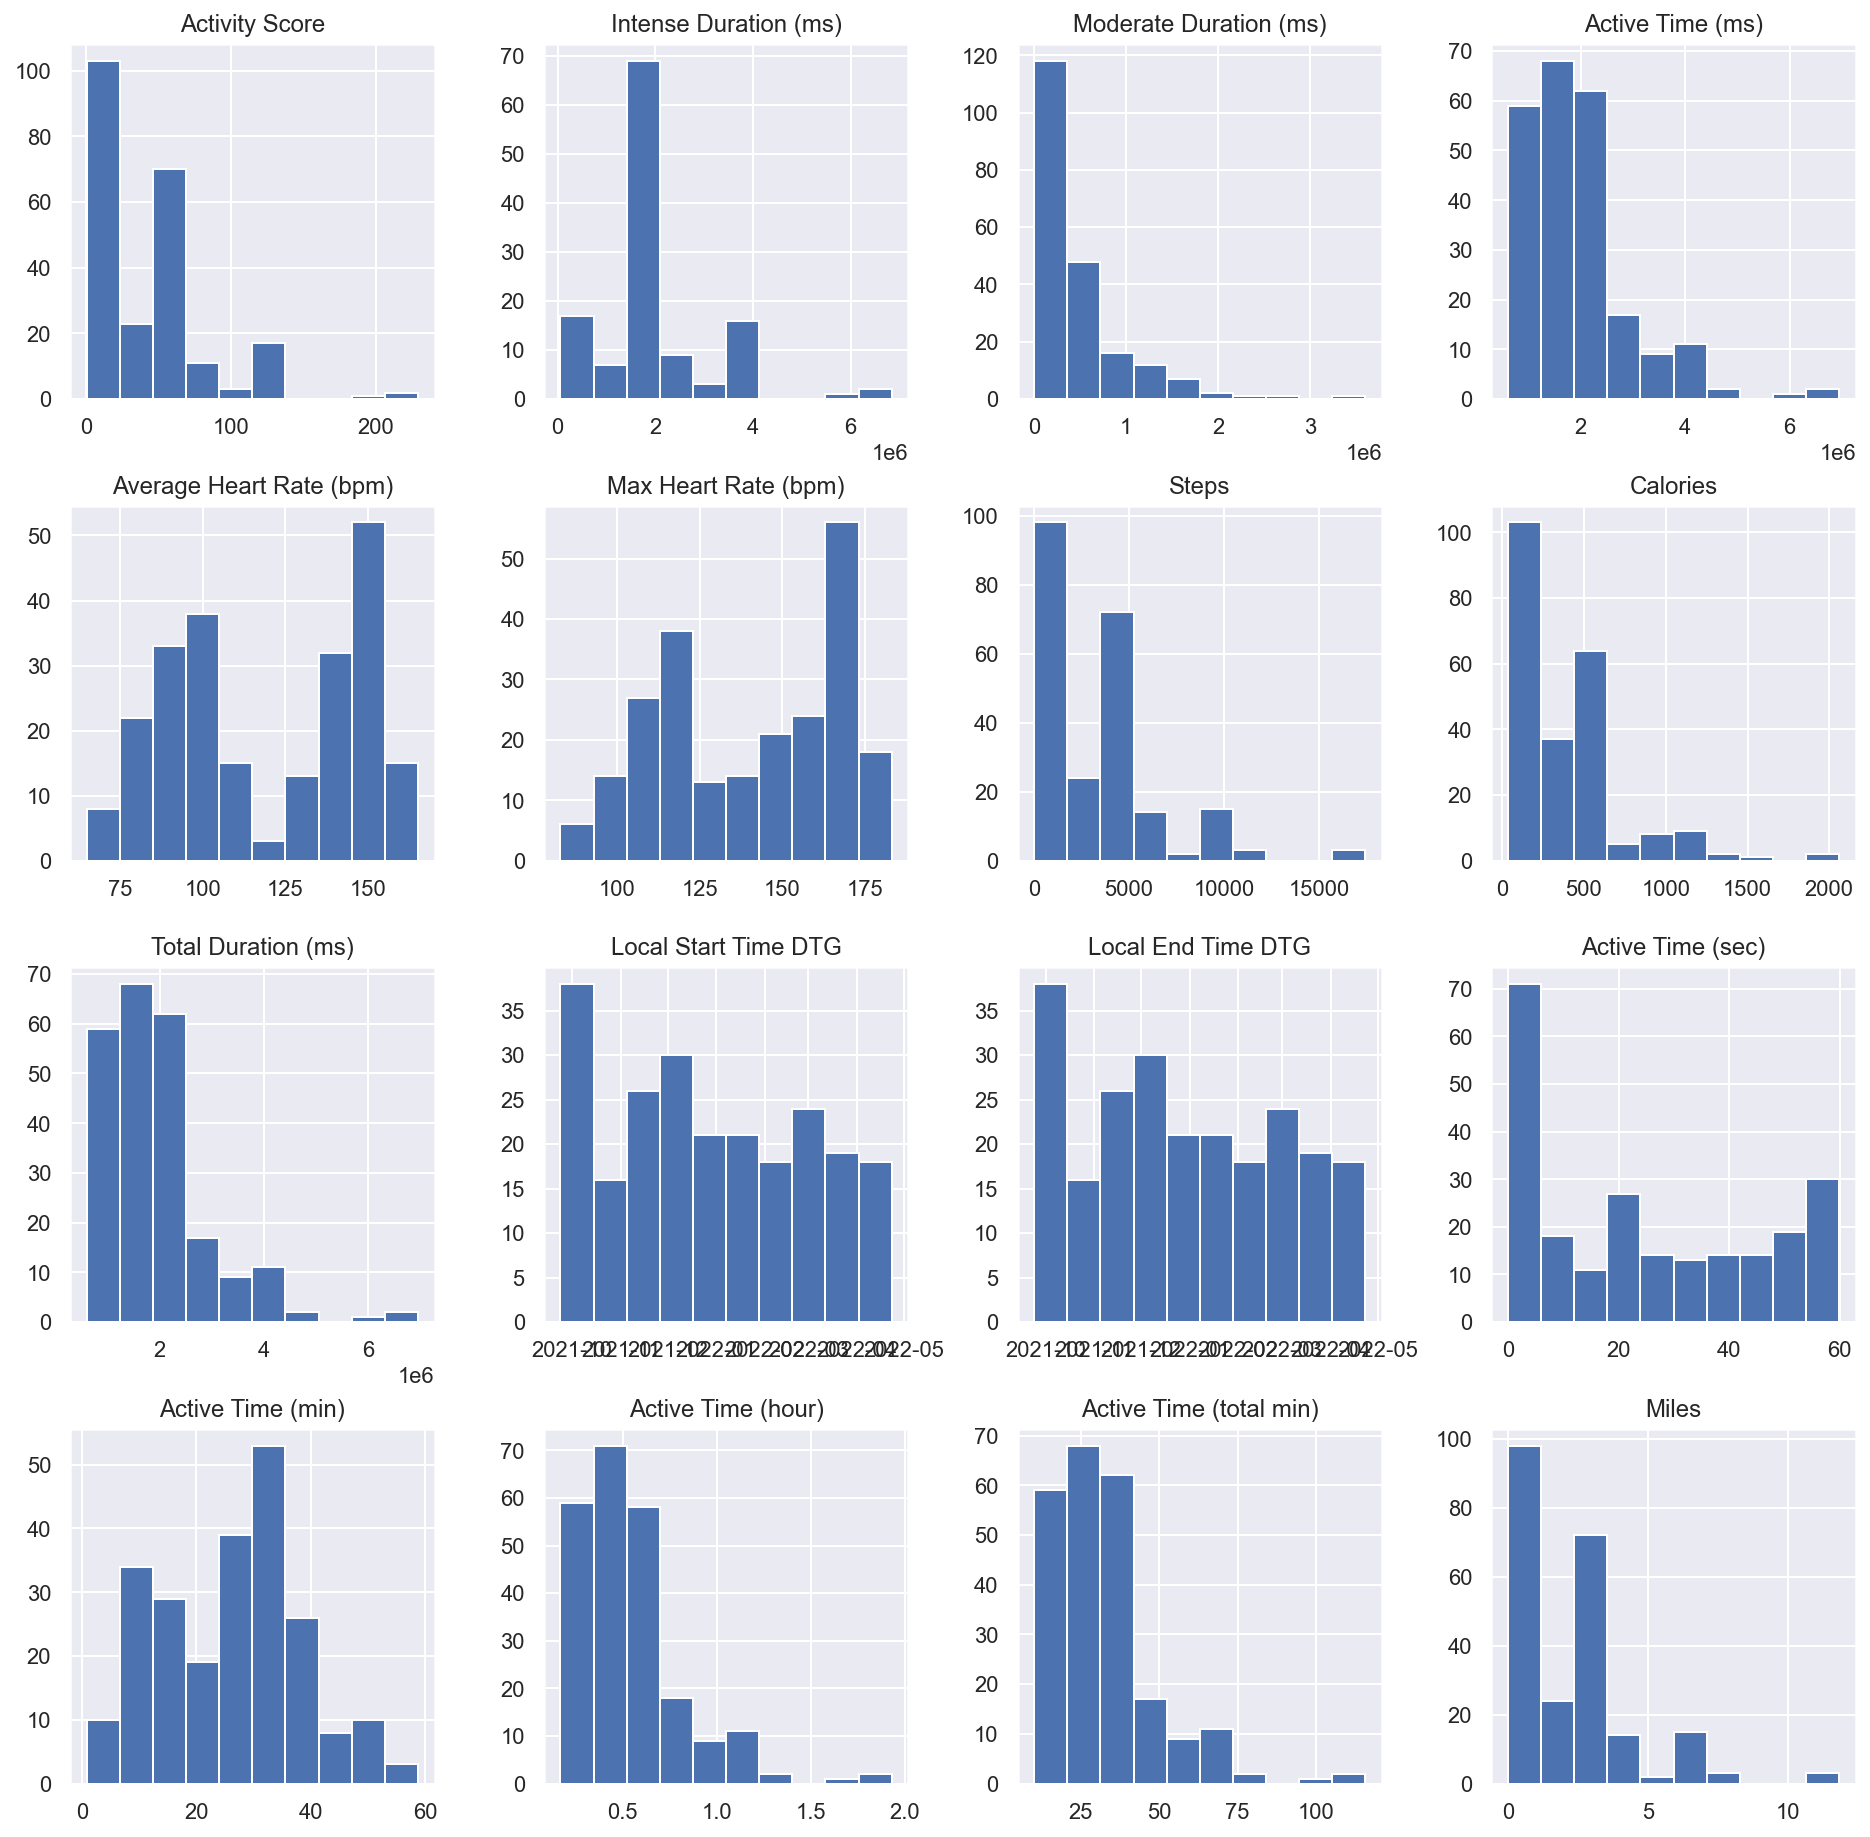

In [613]:
sns.set()
df.hist()

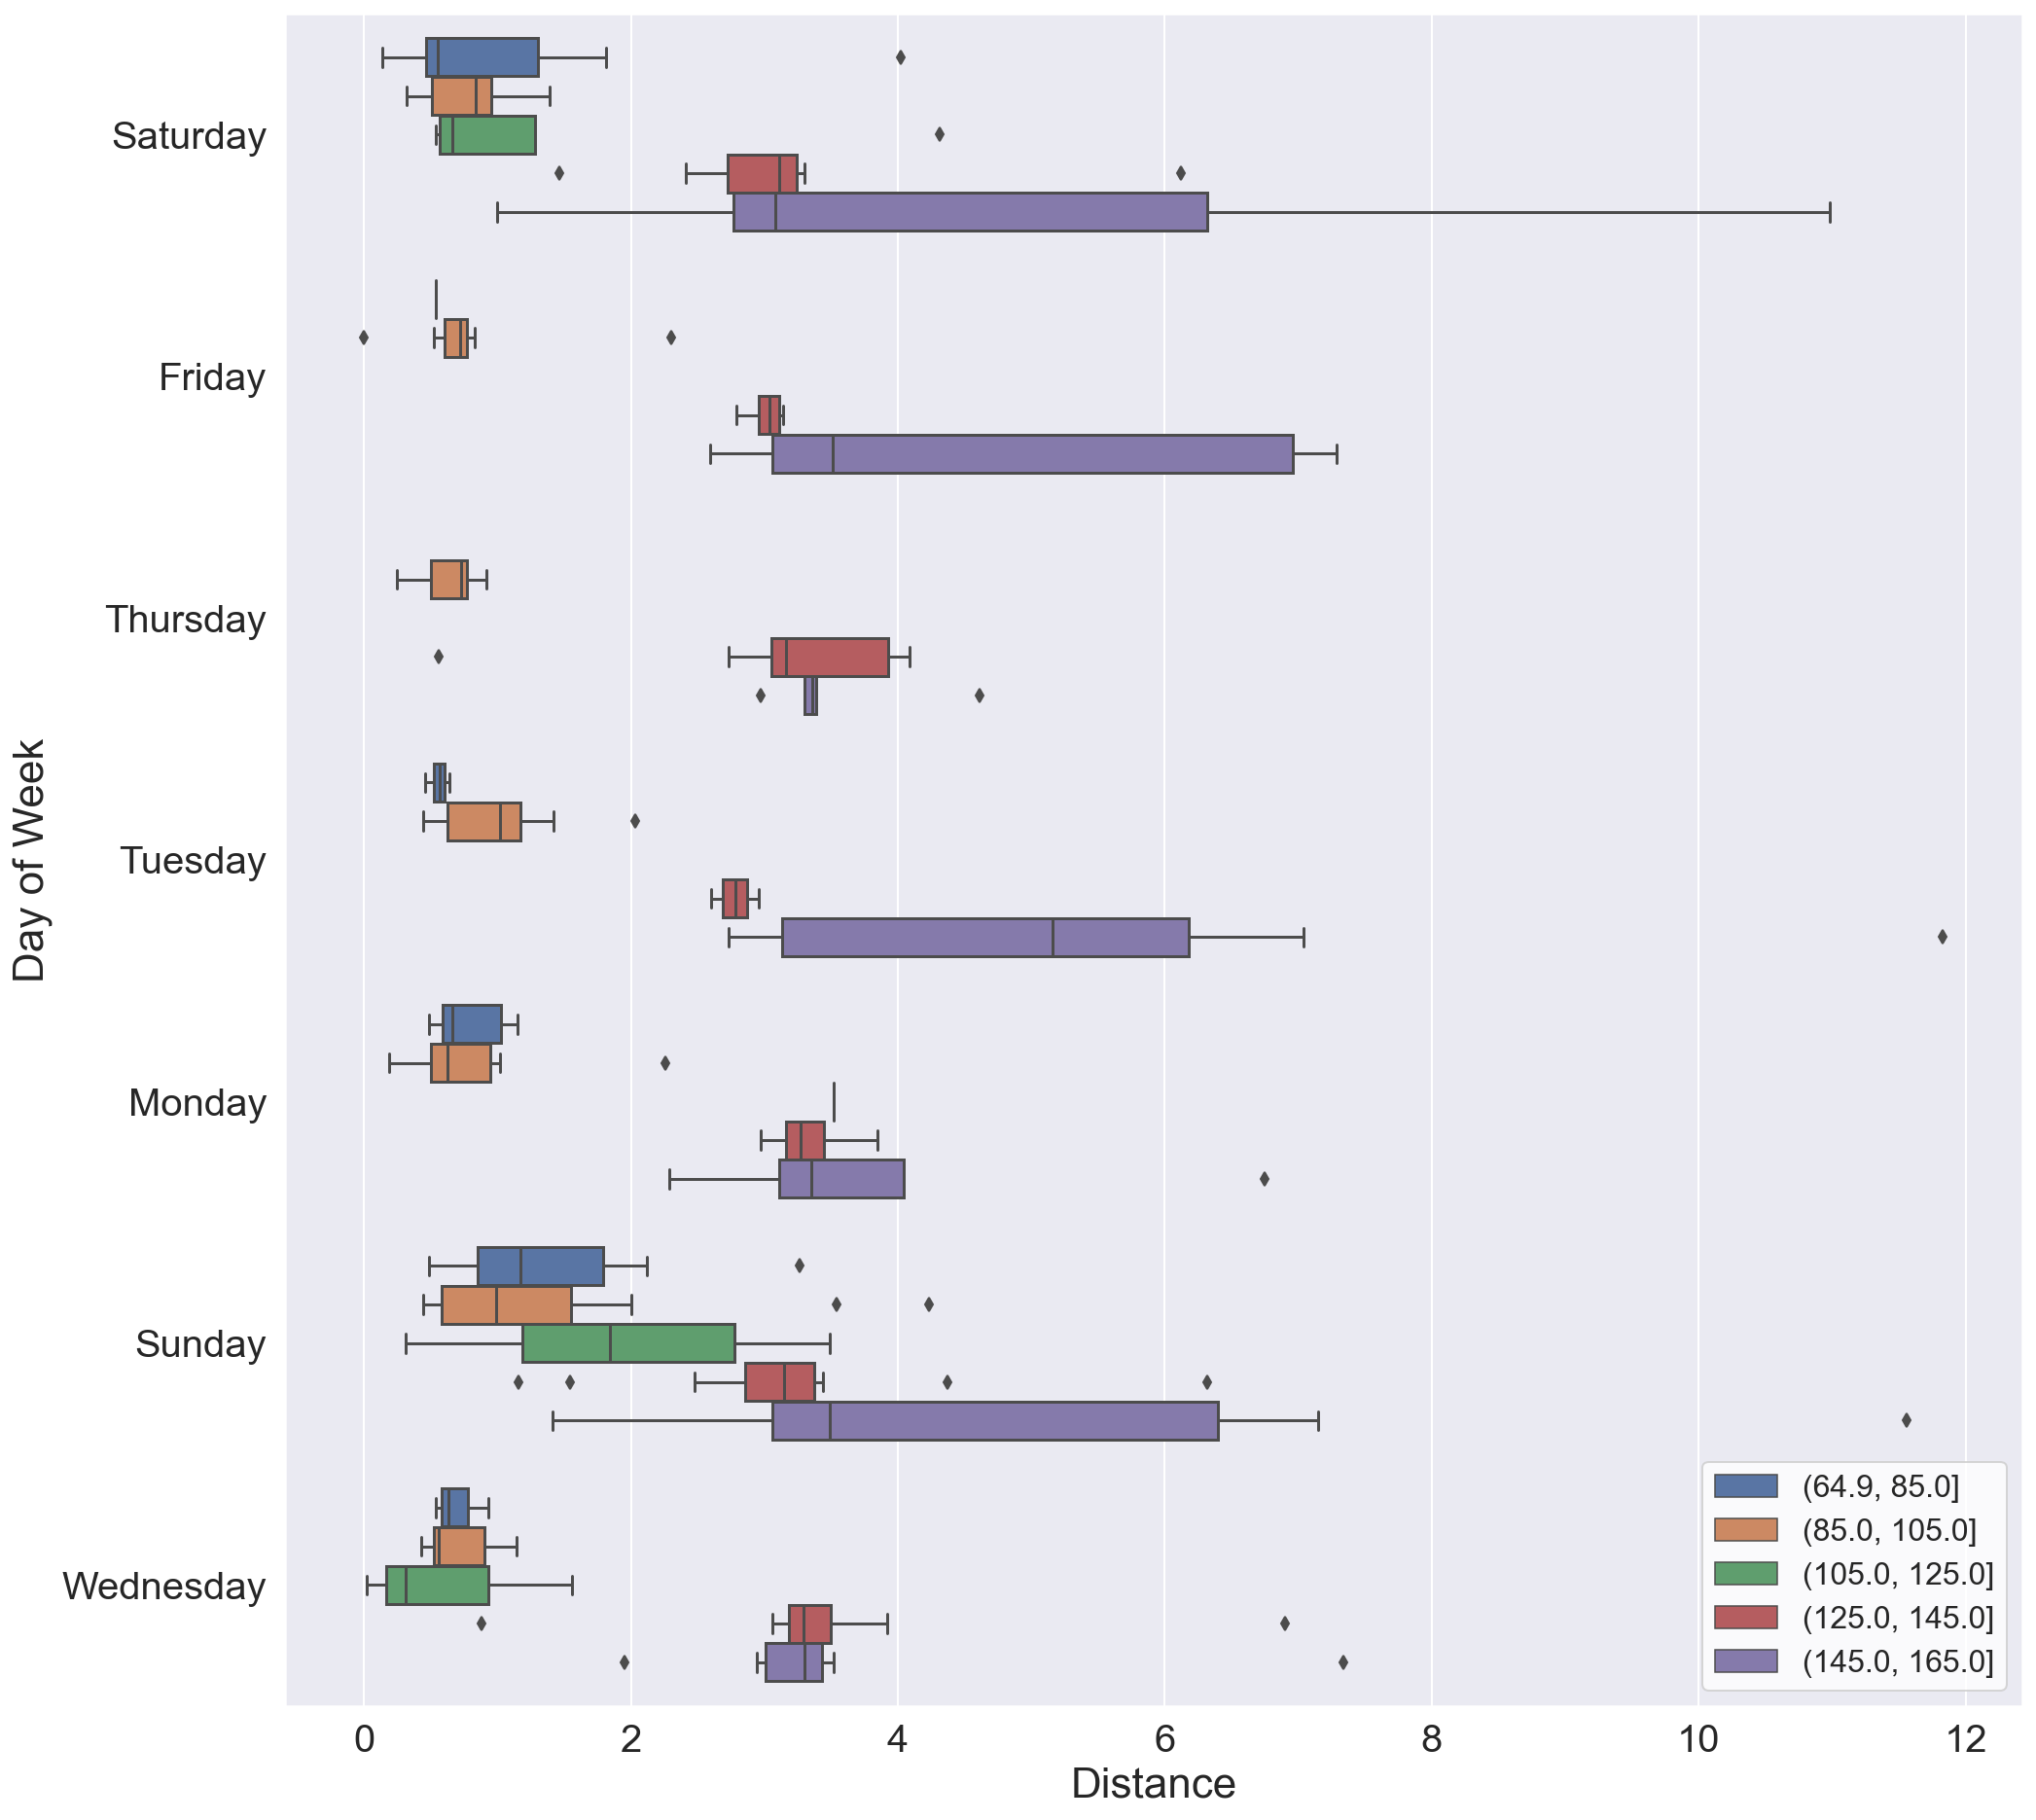

In [617]:
sns.set(rc={"figure.figsize":(16, 16)}) #width=8, height=4
jbox = sns.boxplot(x = 'Miles', y='day_of_week_start', data=df, orient = 'h', hue = (pd.cut(df['Average Heart Rate (bpm)'], bins = 5)))
sns.set_theme(style="whitegrid")
plt.ylabel('Day of Week', fontsize=22)
plt.xlabel('Distance', fontsize=22)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 16)

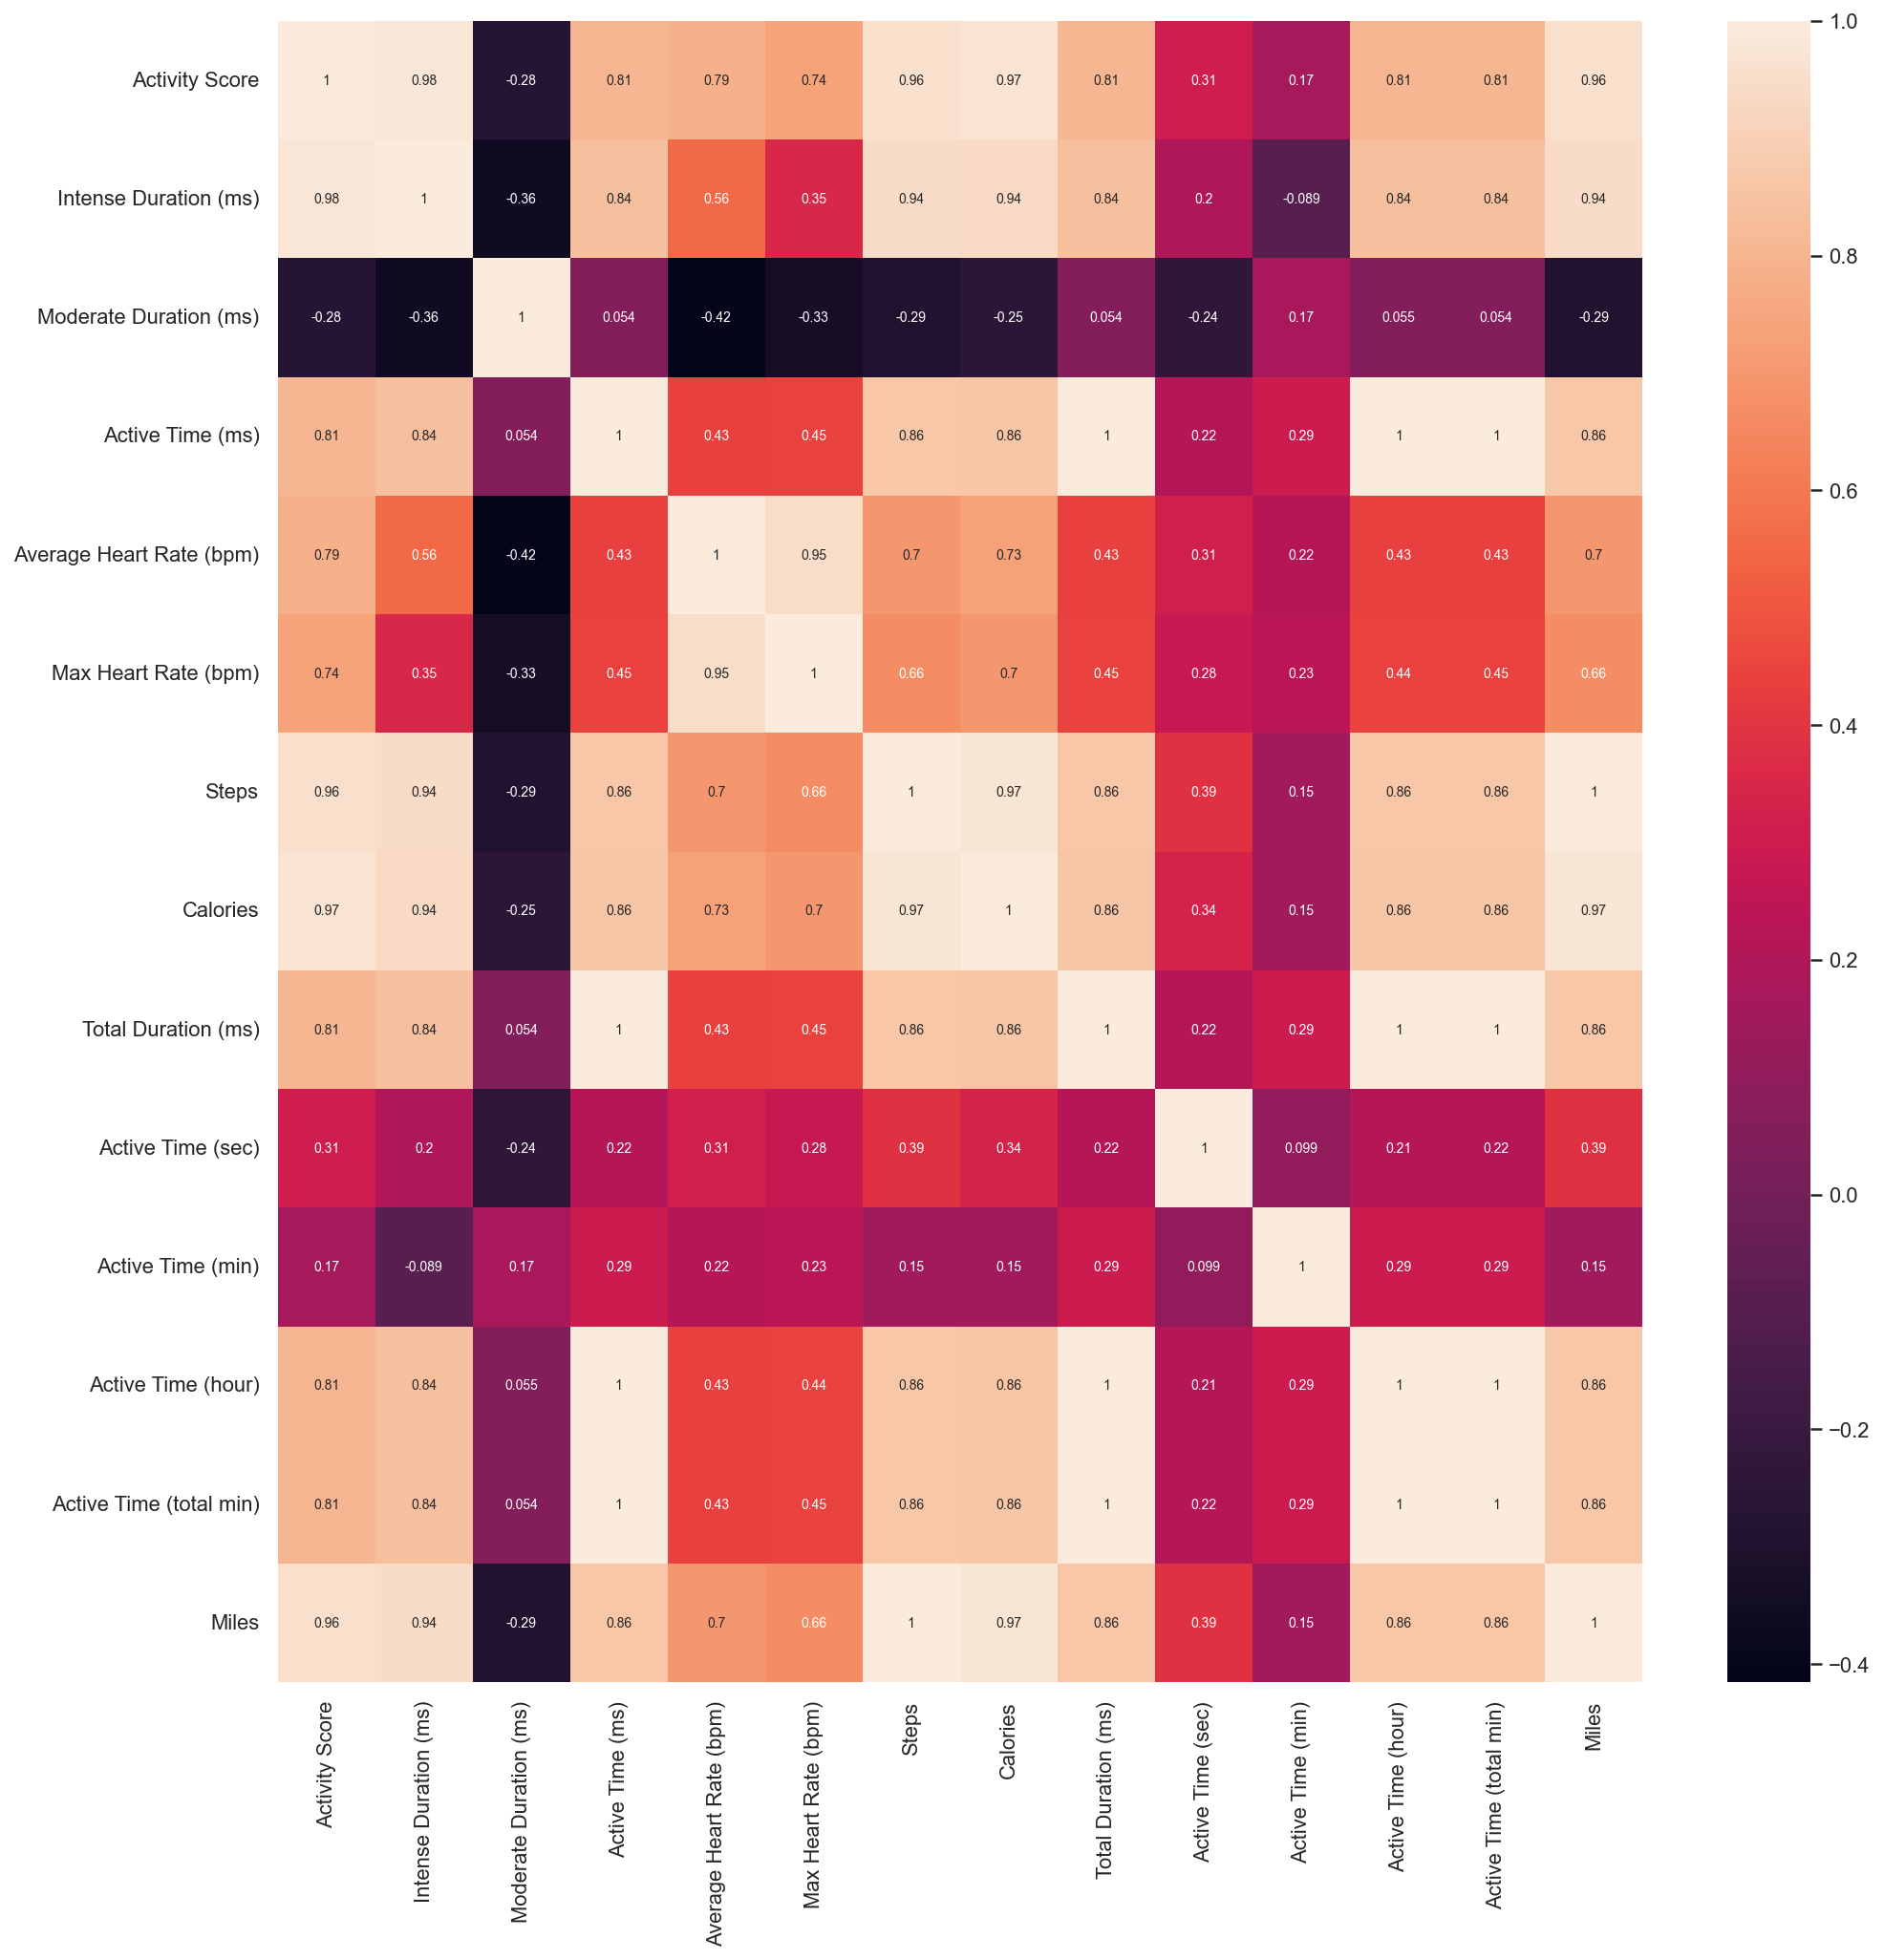

In [620]:
p1 = sns.heatmap(
    df
    .corr(),
    annot=True,
    annot_kws={"size": 7}
)

In [ ]:
# sns.set_context('talk')
# sns.pairplot(df, hue='Miles');

# Join Amazon Halo with Map My Run data

In [235]:
mmr_df = pd.read_csv('https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv')
mmr_df.info()
mmr_df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date Submitted          671 non-null    object 
 1   Workout Date            671 non-null    object 
 2   Activity Type           671 non-null    object 
 3   Calories Burned (kCal)  671 non-null    int64  
 4   Distance (mi)           671 non-null    float64
 5   Workout Time (seconds)  671 non-null    int64  
 6   Avg Pace (min/mi)       671 non-null    float64
 7   Max Pace                671 non-null    float64
 8   Avg Speed (mi/h)        671 non-null    float64
 9   Max Speed               671 non-null    float64
 10  Avg Heart Rate          442 non-null    float64
 11  Steps                   647 non-null    float64
 12  Notes                   671 non-null    object 
 13  Source                  671 non-null    object 
 14  Link                    671 non-null    ob

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace,Avg Speed (mi/h),Max Speed,Avg Heart Rate,Steps,Notes,Source,Link
0,"May 22, 2022","May 22, 2022",Run,420,3.1,1865,10.0269,0.0,5.98391,0.0,NaN,4936.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6595158784


In [238]:
mmr_df['Workout_Date'] = pd.to_datetime(mmr_df['Workout Date']).dt.date
mmr_df.head(1)

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace,Avg Speed (mi/h),Max Speed,Avg Heart Rate,Steps,Notes,Source,Link,Workout_Date
0,"May 22, 2022","May 22, 2022",Run,420,3.1,1865,10.0269,0.0,5.98391,0.0,NaN,4936.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6595158784,2022-05-22


In [242]:
mdf = df.merge(mmr_df, on='Workout_Date', how='left')

In [245]:
mdf.info()
mdf.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 267
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Session Subtype           268 non-null    object             
 1   Activity Score            267 non-null    float64            
 2   Intense Duration (ms)     145 non-null    float64            
 3   Moderate Duration (ms)    241 non-null    float64            
 4   Active Time (ms)          268 non-null    float64            
 5   Average Heart Rate (bpm)  268 non-null    float64            
 6   Max Heart Rate (bpm)      268 non-null    float64            
 7   Steps_x                   268 non-null    float64            
 8   Calories                  268 non-null    float64            
 9   Total Duration (ms)       268 non-null    float64            
 10  Local Start Time DTG      268 non-null    datetime64[ns, UTC]
 11  Local End Time DTG 

Index(['Session Subtype', 'Activity Score', 'Intense Duration (ms)',
       'Moderate Duration (ms)', 'Active Time (ms)',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x',
       'Calories', 'Total Duration (ms)', 'Local Start Time DTG',
       'Local End Time DTG', 'day_of_week_start', 'day_of_week_end',
       'Local Start Time', 'Local End Time', 'Active Time (sec)',
       'Active Time (min)', 'Active Time (hour)', 'Active Time (total min)',
       'Workout_Date', 'Date Submitted', 'Workout Date', 'Activity Type',
       'Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace', 'Avg Speed (mi/h)', 'Max Speed',
       'Avg Heart Rate', 'Steps_y', 'Notes', 'Source', 'Link'],
      dtype='object')

In [261]:
#I will make a trimmed version of my merged dataframe
mdft = mdf[['Workout_Date', 'Distance (mi)', 'Session Subtype', 'Activity Score',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x',
       'Calories', 'day_of_week_start','Local Start Time DTG',
       'Local End Time DTG', 
       'Local Start Time', 'Local End Time', 'Active Time (total min)']]

In [262]:
mdft.head(1)

,Workout_Date,Distance (mi),Session Subtype,Activity Score,Average Heart Rate (bpm),Max Heart Rate (bpm),Steps_x,Calories,day_of_week_start,Local Start Time DTG,Local End Time DTG,Local Start Time,Local End Time,Active Time (total min)
0,2022-04-23,3.1,RUNNING,58.06,134.0,145.0,4585.0,470.0,Saturday,2022-04-23 05:57:36+00:00,2022-04-23 06:29:02+00:00,"Sat, Apr 23 2022 at 05:57:36 AM UTC","Sat, Apr 23 2022 at 06:29:02 AM UTC",31.44


## Cleaning

In [266]:
mdft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 267
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Workout_Date              268 non-null    object             
 1   Distance (mi)             207 non-null    float64            
 2   Session Subtype           268 non-null    object             
 3   Activity Score            267 non-null    float64            
 4   Average Heart Rate (bpm)  268 non-null    float64            
 5   Max Heart Rate (bpm)      268 non-null    float64            
 6   Steps_x                   268 non-null    float64            
 7   Calories                  268 non-null    float64            
 8   day_of_week_start         268 non-null    object             
 9   Local Start Time DTG      268 non-null    datetime64[ns, UTC]
 10  Local End Time DTG        268 non-null    datetime64[ns, UTC]
 11  Local Start Time   

In [268]:
#check the percentage of empty values
for col in mdft.columns:
    pct_missing = np.mean(mdft[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Workout_Date - 0%
Distance (mi) - 23%
Session Subtype - 0%
Activity Score - 0%
Average Heart Rate (bpm) - 0%
Max Heart Rate (bpm) - 0%
Steps_x - 0%
Calories - 0%
day_of_week_start - 0%
Local Start Time DTG - 0%
Local End Time DTG - 0%
Local Start Time - 0%
Local End Time - 0%
Active Time (total min) - 0%


created missing indicator for: Distance (mi)
created missing indicator for: Activity Score


,Workout_Date,Distance (mi),Session Subtype,Activity Score,Average Heart Rate (bpm),Max Heart Rate (bpm),Steps_x,Calories,day_of_week_start,Local Start Time DTG,Local End Time DTG,Local Start Time,Local End Time,Active Time (total min),Distance (mi)_ismissing,Activity Score_ismissing,num_missing
0,2022-04-23,3.10000,RUNNING,58.06,134.0,145.0,4585.0,470.0,Saturday,2022-04-23 05:57:36+00:00,2022-04-23 06:29:02+00:00,"Sat, Apr 23 2022 at 05:57:36 AM UTC","Sat, Apr 23 2022 at 06:29:02 AM UTC",31.44,False,False,0
1,2022-04-23,3.10000,RUNNING,58.06,134.0,145.0,4585.0,470.0,Saturday,2022-04-23 05:57:36+00:00,2022-04-23 06:29:02+00:00,"Sat, Apr 23 2022 at 05:57:36 AM UTC","Sat, Apr 23 2022 at 06:29:02 AM UTC",31.44,False,False,0
2,2022-04-22,3.10000,RUNNING,57.74,130.0,144.0,4626.0,455.0,Friday,2022-04-22 04:25:46+00:00,2022-04-22 04:57:41+00:00,"Fri, Apr 22 2022 at 04:25:46 AM UTC","Fri, Apr 22 2022 at 04:57:41 AM UTC",31.92,False,False,0
3,2022-04-21,3.10142,OTHER,23.20,98.0,115.0,1124.0,176.0,Thursday,2022-04-21 12:59:00+00:00,2022-04-21 13:27:00+00:00,"Thu, Apr 21 2022 at 12:59:00 PM UTC","Thu, Apr 21 2022 at 01:27:00 PM UTC",28.00,False,False,0
4,2022-04-21,3.10142,RUNNING,63.71,150.0,173.0,4952.0,616.0,Thursday,2022-04-21 12:23:29+00:00,2022-04-21 12:58:35+00:00,"Thu, Apr 21 2022 at 12:23:29 PM UTC","Thu, Apr 21 2022 at 12:58:35 PM UTC",35.10,False,False,0
5,2022-04-19,5.01831,OTHER,12.85,93.0,120.0,1510.0,177.0,Tuesday,2022-04-19 13:13:00+00:00,2022-04-19 13:46:00+00:00,"Tue, Apr 19 2022 at 01:13:00 PM UTC","Tue, Apr 19 2022 at 01:46:00 PM UTC",33.00,False,False,0
6,2022-04-19,5.01831,RUNNING,96.91,151.0,168.0,7840.0,895.0,Tuesday,2022-04-19 12:13:38+00:00,2022-04-19 13:02:46+00:00,"Tue, Apr 19 2022 at 12:13:38 PM UTC","Tue, Apr 19 2022 at 01:02:46 PM UTC",49.13,False,False,0
7,2022-04-18,3.09845,OTHER,16.85,96.0,117.0,1501.0,178.0,Monday,2022-04-18 12:44:00+00:00,2022-04-18 13:17:00+00:00,"Mon, Apr 18 2022 at 12:44:00 PM UTC","Mon, Apr 18 2022 at 01:17:00 PM UTC",33.00,False,False,0
8,2022-04-18,3.09845,RUNNING,62.48,147.0,168.0,4948.0,583.0,Monday,2022-04-18 12:09:17+00:00,2022-04-18 12:43:26+00:00,"Mon, Apr 18 2022 at 12:09:17 PM UTC","Mon, Apr 18 2022 at 12:43:26 PM UTC",34.16,False,False,0
9,2022-04-17,3.10000,RUNNING,62.63,131.0,148.0,4850.0,497.0,Sunday,2022-04-17 17:12:26+00:00,2022-04-17 17:46:36+00:00,"Sun, Apr 17 2022 at 05:12:26 PM UTC","Sun, Apr 17 2022 at 05:46:36 PM UTC",34.16,False,False,0


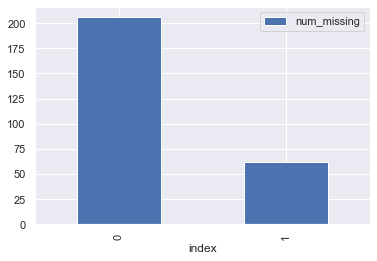

In [273]:
for col in mdft.columns:
    missing = mdft[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        mdft['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in mdft.columns if 'ismissing' in col]
mdft['num_missing'] = mdft[ismissing_cols].sum(axis=1)

mdft['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')
mdft.head(10)

In [294]:
# drop rows with missing values.
ind_missing = mdft[mdft['Distance (mi)_ismissing'] == 1].index
mdft_lmr = mdft.drop(ind_missing, axis=0)

ind_missing2 = mdft[mdft['Activity Score_ismissing'] == 1].index
mdft_lmr2 = mdft_lmr.drop(ind_missing2, axis=0)


mdft_lmr2.columns

Index(['Workout_Date', 'Distance (mi)', 'Session Subtype', 'Activity Score',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x',
       'Calories', 'day_of_week_start', 'Local Start Time DTG',
       'Local End Time DTG', 'Local Start Time', 'Local End Time',
       'Active Time (total min)', 'Distance (mi)_ismissing',
       'Activity Score_ismissing', 'num_missing'],
      dtype='object')

In [296]:
#I am going to shorten the name of the DF
df2 = mdft_lmr2[['Workout_Date', 'Distance (mi)', 'Session Subtype', 'Activity Score',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x',
       'Calories', 'day_of_week_start', 'Local Start Time DTG',
       'Local End Time DTG', 'Local Start Time', 'Local End Time',
       'Active Time (total min)']]
df2.head(1)

,Workout_Date,Distance (mi),Session Subtype,Activity Score,Average Heart Rate (bpm),Max Heart Rate (bpm),Steps_x,Calories,day_of_week_start,Local Start Time DTG,Local End Time DTG,Local Start Time,Local End Time,Active Time (total min)
0,2022-04-23,3.1,RUNNING,58.06,134.0,145.0,4585.0,470.0,Saturday,2022-04-23 05:57:36+00:00,2022-04-23 06:29:02+00:00,"Sat, Apr 23 2022 at 05:57:36 AM UTC","Sat, Apr 23 2022 at 06:29:02 AM UTC",31.44


<AxesSubplot:>

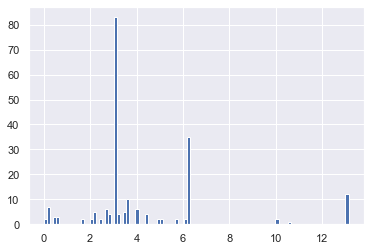

In [297]:
df2['Distance (mi)'].hist(bins=100)

In [470]:
#I noticed too many half-marathons in this dataset, so I will visually inspect the DF
pd.set_option('display.max_rows', 8)
df2.sort_values(by='Distance (mi)', ascending = False)

,Workout_Date,Distance (mi),Session Subtype,Activity Score,Average Heart Rate (bpm),Max Heart Rate (bpm),Steps_x,Calories,day_of_week_start,Local Start Time DTG,Local End Time DTG,Local Start Time,Local End Time,Active Time (total min),day_of_week
64,2022-03-01,10.51000,RUNNING,229.12,147.0,164.0,17452.0,1868.0,Tuesday,2022-03-01 05:05:15+00:00,2022-03-01 07:01:04+00:00,"Tue, Mar 01 2022 at 05:05:15 AM UTC","Tue, Mar 01 2022 at 07:01:04 AM UTC",115.82,Tuesday
48,2022-03-11,6.20247,RUNNING,131.09,147.0,168.0,10754.0,1157.0,Friday,2022-03-11 12:52:06+00:00,2022-03-11 14:03:45+00:00,"Fri, Mar 11 2022 at 12:52:06 PM UTC","Fri, Mar 11 2022 at 02:03:45 PM UTC",71.65,Friday
150,2021-12-22,6.20107,RUNNING,127.03,143.0,163.0,10176.0,1155.0,Wednesday,2021-12-22 13:12:01+00:00,2021-12-22 14:20:55+00:00,"Wed, Dec 22 2021 at 01:12:01 PM UTC","Wed, Dec 22 2021 at 02:20:55 PM UTC",68.91,Wednesday
117,2022-01-17,6.20000,RUNNING,131.51,153.0,173.0,9963.0,1232.0,Monday,2022-01-17 20:11:57+00:00,2022-01-17 21:20:30+00:00,"Mon, Jan 17 2022 at 08:11:57 PM UTC","Mon, Jan 17 2022 at 09:20:30 PM UTC",68.55,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,2022-03-23,3.10000,RUNNING,59.66,135.0,151.0,4751.0,422.0,Wednesday,2022-03-23 04:44:42+00:00,2022-03-23 05:16:36+00:00,"Wed, Mar 23 2022 at 04:44:42 AM UTC","Wed, Mar 23 2022 at 05:16:36 AM UTC",31.89,Wednesday
35,2022-03-25,3.10000,RUNNING,58.80,132.0,145.0,4585.0,426.0,Friday,2022-03-25 05:33:01+00:00,2022-03-25 06:05:45+00:00,"Fri, Mar 25 2022 at 05:33:01 AM UTC","Fri, Mar 25 2022 at 06:05:45 AM UTC",32.73,Friday
26,2022-03-31,3.10000,RUNNING,60.38,139.0,152.0,4744.0,450.0,Thursday,2022-03-31 04:37:08+00:00,2022-03-31 05:09:20+00:00,"Thu, Mar 31 2022 at 04:37:08 AM UTC","Thu, Mar 31 2022 at 05:09:20 AM UTC",32.19,Thursday
111,2022-01-23,3.10000,RUNNING,58.03,143.0,163.0,4411.0,491.0,Sunday,2022-01-23 19:04:23+00:00,2022-01-23 19:37:27+00:00,"Sun, Jan 23 2022 at 07:04:23 PM UTC","Sun, Jan 23 2022 at 07:37:27 PM UTC",33.06,Sunday


In [315]:
df2.drop_duplicates(subset ="Workout_Date",
                     keep = False, inplace = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 2 to 263
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Workout_Date              29 non-null     object             
 1   Distance (mi)             29 non-null     float64            
 2   Session Subtype           29 non-null     object             
 3   Activity Score            29 non-null     float64            
 4   Average Heart Rate (bpm)  29 non-null     float64            
 5   Max Heart Rate (bpm)      29 non-null     float64            
 6   Steps_x                   29 non-null     float64            
 7   Calories                  29 non-null     float64            
 8   day_of_week_start         29 non-null     object             
 9   Local Start Time DTG      29 non-null     datetime64[ns, UTC]
 10  Local End Time DTG        29 non-null     datetime64[ns, UTC]
 11  Local Start Time    

<AxesSubplot:>

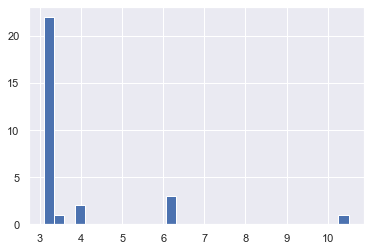

In [306]:
df2['Distance (mi)'].hist(bins=30)

## Double Checking my Join

In [310]:
merged = pd.merge(df,mmr_df,on=['Workout_Date'], how='outer').drop_duplicates()
merged.info()
merged.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846 entries, 0 to 846
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype              
---  ------                            --------------  -----              
 0   Session Subtype                   267 non-null    object             
 1   Activity Score                    266 non-null    float64            
 2   Intense Duration (ms)             145 non-null    float64            
 3   Moderate Duration (ms)            240 non-null    float64            
 4   Active Time (ms)                  267 non-null    float64            
 5   Average Heart Rate (bpm)          267 non-null    float64            
 6   Max Heart Rate (bpm)              267 non-null    float64            
 7   Steps_x                           267 non-null    float64            
 8   Calories                          267 non-null    float64            
 9   Total Duration (ms)               267 non-null    float64        

Index(['Session Subtype', 'Activity Score', 'Intense Duration (ms)',
       'Moderate Duration (ms)', 'Active Time (ms)',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x',
       'Calories', 'Total Duration (ms)', 'Local Start Time DTG',
       'Local End Time DTG', 'day_of_week_start', 'day_of_week_end',
       'Local Start Time', 'Local End Time', 'Active Time (sec)',
       'Active Time (min)', 'Active Time (hour)', 'Active Time (total min)',
       'Workout_Date', 'Activity Score_ismissing',
       'Intense Duration (ms)_ismissing', 'Moderate Duration (ms)_ismissing',
       'num_missing', 'Date Submitted', 'Workout Date', 'Activity Type',
       'Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace', 'Avg Speed (mi/h)', 'Max Speed',
       'Avg Heart Rate', 'Steps_y', 'Notes', 'Source', 'Link'],
      dtype='object')

In [311]:
merged2 = merged[['Workout_Date', 'Distance (mi)', 'Session Subtype', 'Activity Score',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x',
       'Calories', 'day_of_week_start', 'Local Start Time DTG',
       'Local End Time DTG', 'Local Start Time', 'Local End Time',
       'Active Time (total min)']]

In [314]:
merged2.info()
merged2.sort_values(by='Workout_Date', ascending = False)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 846 entries, 0 to 846
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Workout_Date              846 non-null    object             
 1   Distance (mi)             786 non-null    float64            
 2   Session Subtype           267 non-null    object             
 3   Activity Score            266 non-null    float64            
 4   Average Heart Rate (bpm)  267 non-null    float64            
 5   Max Heart Rate (bpm)      267 non-null    float64            
 6   Steps_x                   267 non-null    float64            
 7   Calories                  267 non-null    float64            
 8   day_of_week_start         267 non-null    object             
 9   Local Start Time DTG      267 non-null    datetime64[ns, UTC]
 10  Local End Time DTG        267 non-null    datetime64[ns, UTC]
 11  Local Start Time   

,Workout_Date,Distance (mi),Session Subtype,Activity Score,Average Heart Rate (bpm),Max Heart Rate (bpm),Steps_x,Calories,day_of_week_start,Local Start Time DTG,Local End Time DTG,Local Start Time,Local End Time,Active Time (total min)
268,2022-05-22,3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
269,2022-05-20,3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,2016-09-26,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
846,2016-08-12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN


In [322]:
mrg3 = merged2.drop_duplicates()
mrg4 = mrg3.dropna()
mrg4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 2 to 263
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Workout_Date              29 non-null     object             
 1   Distance (mi)             29 non-null     float64            
 2   Session Subtype           29 non-null     object             
 3   Activity Score            29 non-null     float64            
 4   Average Heart Rate (bpm)  29 non-null     float64            
 5   Max Heart Rate (bpm)      29 non-null     float64            
 6   Steps_x                   29 non-null     float64            
 7   Calories                  29 non-null     float64            
 8   day_of_week_start         29 non-null     object             
 9   Local Start Time DTG      29 non-null     datetime64[ns, UTC]
 10  Local End Time DTG        29 non-null     datetime64[ns, UTC]
 11  Local Start Time    

## EDA

Now that I have cleaned and merged my dataframes, I will explore the data

In [326]:
df2.columns

Index(['Workout_Date', 'Distance (mi)', 'Session Subtype', 'Activity Score',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x',
       'Calories', 'day_of_week_start', 'Local Start Time DTG',
       'Local End Time DTG', 'Local Start Time', 'Local End Time',
       'Active Time (total min)'],
      dtype='object')

<AxesSubplot:xlabel='Workout_Date'>

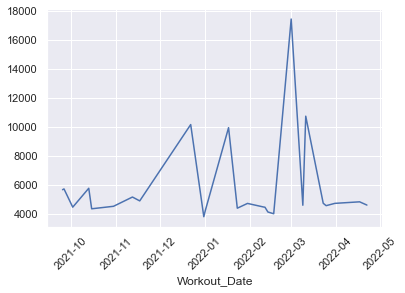

In [330]:
# show data with a mask filter (running only)
mask1 = df2['Session Subtype'] == 'RUNNING'
(
    df2[mask1]
    .set_index('Workout_Date')
    ['Steps_x']
    .plot(rot = 45)
)

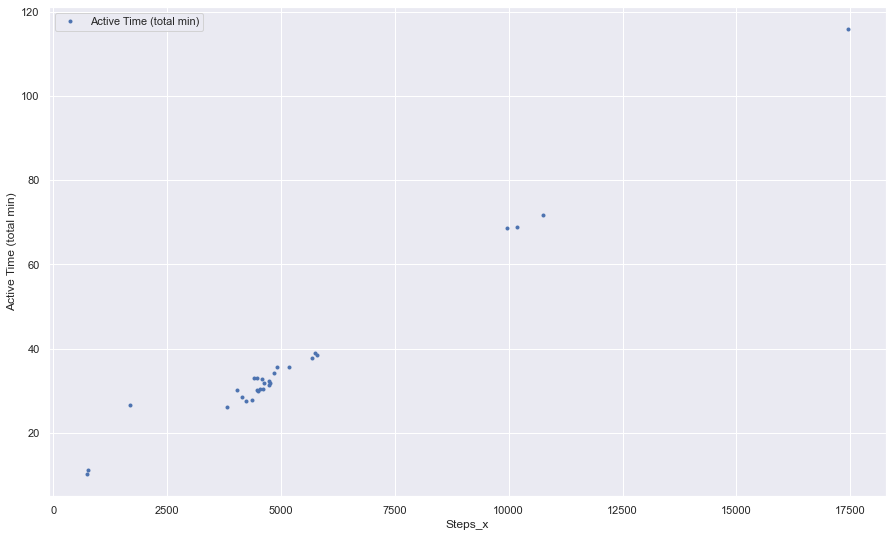

In [328]:
#scatter plotting my steps against my total minutes
axes = df2.plot(x='Steps_x', y='Active Time (total min)', style='.',figsize=(15,9))
y_label = axes.set_ylabel('Active Time (total min)')

In [331]:
df.corr()

,Activity Score,Intense Duration (ms),Moderate Duration (ms),Active Time (ms),Average Heart Rate (bpm),Max Heart Rate (bpm),Steps,Calories,Total Duration (ms),Active Time (sec),Active Time (min),Active Time (hour),Active Time (total min),Activity Score_ismissing,Intense Duration (ms)_ismissing,Moderate Duration (ms)_ismissing,num_missing
Activity Score,1.000000,0.981333,-0.275005,0.805751,0.787979,0.738204,0.959170,0.969623,0.805751,0.308616,0.168599,0.805663,0.805747,NaN,-0.720877,-0.148841,-0.652556
Intense Duration (ms),0.981333,1.000000,-0.356315,0.837865,0.555479,0.349183,0.940914,0.939028,0.837865,0.195852,-0.088730,0.838025,0.837867,NaN,NaN,0.052174,0.052174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Moderate Duration (ms)_ismissing,-0.148841,0.052174,NaN,-0.187069,-0.186026,-0.241934,-0.128277,-0.123229,-0.187069,0.026901,-0.160097,-0.186310,-0.187063,0.189278,0.151460,1.000000,0.623474
num_missing,-0.652556,0.052174,0.392227,-0.428166,-0.780504,-0.818660,-0.592278,-0.587079,-0.428166,-0.235482,-0.257476,-0.427460,-0.428159,0.250021,0.860814,0.623474,1.000000


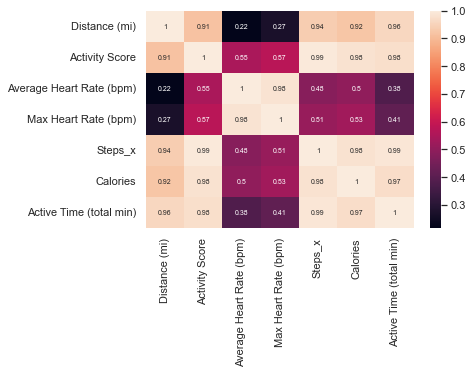

In [332]:
p1 = sns.heatmap(
    df2
    .corr(),
    annot=True,
    annot_kws={"size": 7}
)


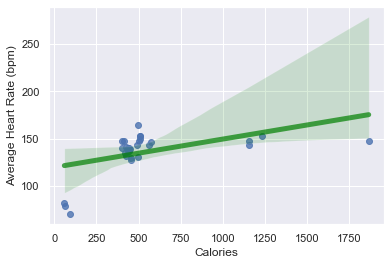

In [334]:
# Calories & Heart Rate
sns.regplot(x=df2["Calories"], y=df2["Average Heart Rate (bpm)"],
            line_kws={"color": "green", "alpha": 0.7, "lw": 5})
plt.show()

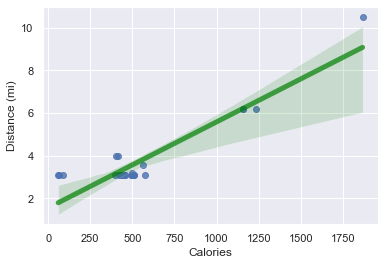

In [335]:
#Calories & Distance
sns.regplot(x=df2["Calories"], y=df2["Distance (mi)"],
            line_kws={"color": "green", "alpha": 0.7, "lw": 5})
plt.show()

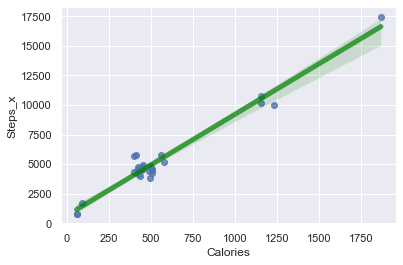

In [336]:
#Calories & Steps
sns.regplot(x=df2["Calories"], y=df2["Steps_x"],
            line_kws={"color": "green", "alpha": 0.7, "lw": 5})
plt.show()

In [340]:
df2.columns

Index(['Workout_Date', 'Distance (mi)', 'Session Subtype', 'Activity Score',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x',
       'Calories', 'day_of_week_start', 'Local Start Time DTG',
       'Local End Time DTG', 'Local Start Time', 'Local End Time',
       'Active Time (total min)'],
      dtype='object')

In [345]:
df_num = df2.select_dtypes(include = ['float64', 'int64'])
df_num_corr = df_num.corr()['Distance (mi)'][:-1] # -1 means that the latest row is Active Time (total min)
top_features = df_num_corr[abs(df_num_corr) > 0.3].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There are {} strongly correlated values with Distance:\n{}".format(len(top_features), top_features))

There are 4 strongly correlated values with Distance:
Distance (mi)     1.000000
Steps_x           0.937856
Calories          0.922163
Activity Score    0.914642
Name: Distance (mi), dtype: float64


<AxesSubplot:>

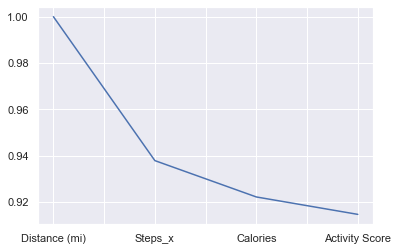

In [346]:
top_features.plot()

Generate pair plots to visually inspect the correlation between some of these features and the target variable. We will use seaborns sns.pairplot() function for this analysis. Also, building pair plots is one of the possible ways to spot the outliers that might be present in the data.

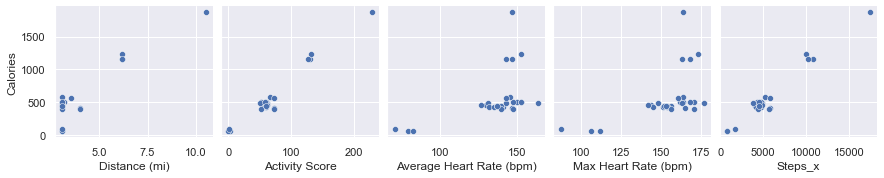

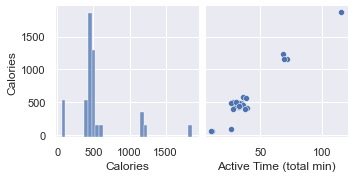

In [358]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['Calories'])

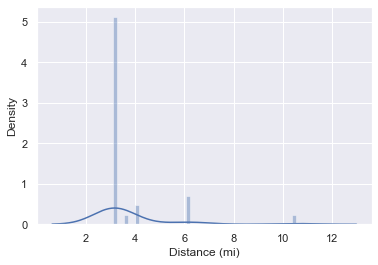

In [351]:
df_untransformed = sns.distplot(df2['Distance (mi)'])

In [353]:
print("Skewness: %f" % df2['Distance (mi)'].skew())

Skewness: 3.144684


In [354]:
log_transformed = np.log(df2['Distance (mi)'])

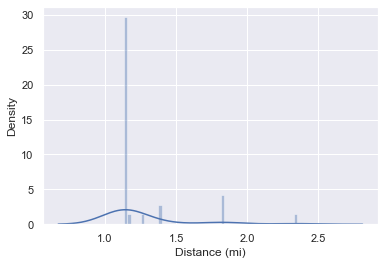

In [355]:
df_transformed = sns.distplot(log_transformed)

In [356]:
print("Skewness: %f" % (log_transformed).skew())

Skewness: 2.442761


In [357]:
norm_data = MinMaxScaler().fit_transform(df_num)
norm_data

array([[0.00000000e+00, 2.50339005e-01, 6.38297872e-01, 6.33333333e-01,
        2.32159962e-01, 2.18905473e-01, 2.05492424e-01],
       [0.00000000e+00, 2.71729146e-01, 6.48936170e-01, 6.77777778e-01,
        2.45569923e-01, 2.42122720e-01, 2.26704545e-01],
       [0.00000000e+00, 2.61887057e-01, 7.34042553e-01, 7.22222222e-01,
        2.39224138e-01, 2.16141515e-01, 2.08049242e-01],
       [0.00000000e+00, 2.54975723e-01, 6.59574468e-01, 6.44444444e-01,
        2.29705460e-01, 2.02874516e-01, 2.13162879e-01],
       [0.00000000e+00, 2.58737588e-01, 6.91489362e-01, 7.11111111e-01,
        2.39643199e-01, 2.00663350e-01, 2.05208333e-01],
       [0.00000000e+00, 1.21604479e-02, 9.57446809e-02, 2.77777778e-01,
        6.58524904e-04, 1.65837479e-03, 9.65909091e-03],
       [4.18686910e-01, 5.71191111e-01, 8.19148936e-01, 9.00000000e-01,
        5.99018199e-01, 6.06965174e-01, 5.81723485e-01],
       [0.00000000e+00, 2.60618521e-01, 8.51063830e-01, 8.33333333e-01,
        2.31501437e-01, 2

In [359]:
scaled_data = StandardScaler().fit_transform(df_num)
scaled_data

array([[-0.4143528 , -0.2181788 , -0.2795941 , -0.46781748, -0.22452211,
        -0.25412005, -0.26639601],
       [-0.4143528 , -0.10362887, -0.23326136, -0.26682923, -0.15380717,
        -0.13858507, -0.1548007 ],
       [-0.4143528 , -0.1563359 ,  0.13740053, -0.06584098, -0.18727049,
        -0.26787421, -0.25294479],
       [-0.4143528 , -0.19334794, -0.18692863, -0.41757042, -0.23746547,
        -0.33389421, -0.22604235],
       [-0.4143528 , -0.17320214, -0.04793042, -0.11608804, -0.18506065,
        -0.34489754, -0.26789059],
       [-0.4143528 , -1.49368877, -2.64256367, -2.0757235 , -1.44530187,
        -1.3351974 , -1.29665985],
       [ 1.54032248,  1.50007015,  0.50806242,  0.73811203,  1.71003656,
         1.67696467,  1.71292616],
       [-0.4143528 , -0.16312925,  0.64706063,  0.43662965, -0.22799471,
        -0.11382757, -0.34062682],
       [ 4.25423185,  3.79645659,  0.50806242,  0.53712378,  3.82453949,
         3.63280689,  3.91344618],
       [-0.4143528 , -0.2924

<AxesSubplot:xlabel='Distance (mi)'>

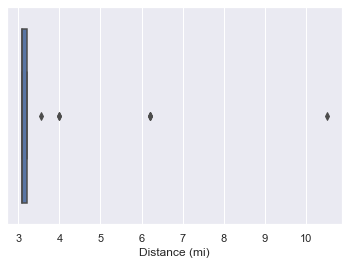

In [360]:
sns.boxplot(x=df2['Distance (mi)'])

<AxesSubplot:xlabel='Steps_x'>

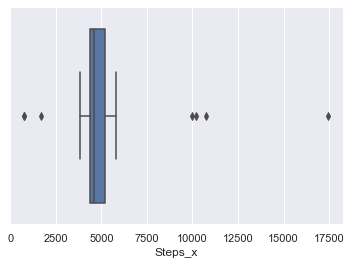

In [362]:
sns.boxplot(x=df2['Steps_x'])

<AxesSubplot:xlabel='Average Heart Rate (bpm)'>

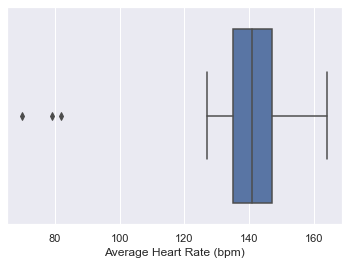

In [365]:
sns.boxplot(x=df2['Average Heart Rate (bpm)'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


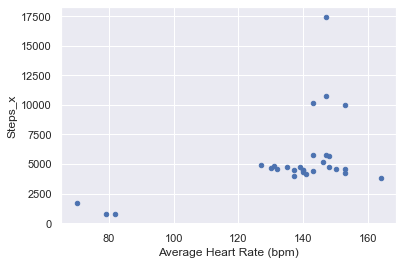

In [367]:
scat_area = df2.plot.scatter(x='Average Heart Rate (bpm)',
                      y='Steps_x')

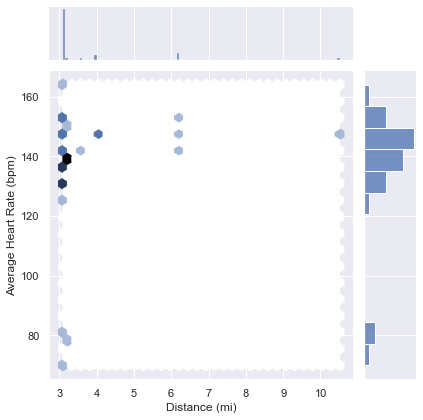

In [368]:
sns.jointplot(x=df2['Distance (mi)'],
y=df2['Average Heart Rate (bpm)'], kind='hex')

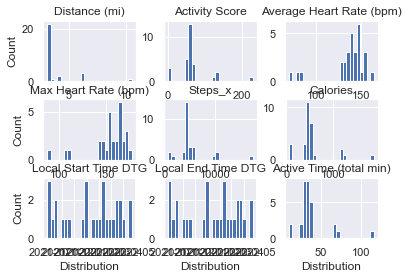

In [369]:
axList = df2.hist(bins=25)

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Distribution')
        
    if ax.is_first_col():
        ax.set_ylabel('Count')

Text(0.5, 1.0, 'Category Histogram')

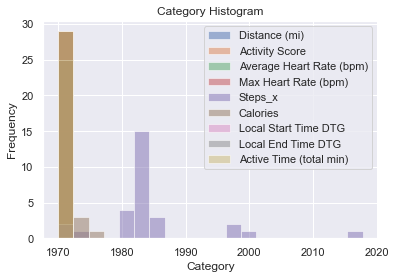

In [370]:
import seaborn as sns
sns.set_context('notebook')
# This uses the `.plot.hist` method
ax = df2.plot.hist(bins=20, alpha=0.5)
ax.set_xlabel('Category');
plt.title('Category Histogram')

In [374]:
df2['day_of_week']=df2['Local Start Time DTG'].dt.day_name()


Text(0.5, 1.0, 'Avg_Distance by Day')

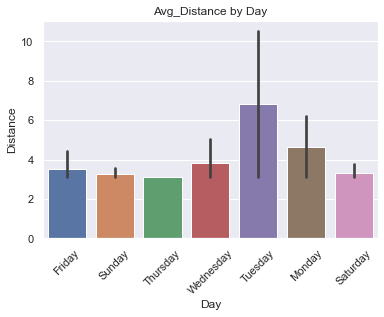

In [376]:
days = sns.barplot(x='day_of_week',y='Distance (mi)', data=df2)
plt.ylabel('Distance')
plt.xlabel('Day')
plt.xticks(rotation = 45)
plt.title('Avg_Distance by Day')

## Train / Test Models

In [420]:
df4 = df2[['Distance (mi)','Activity Score',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x',
       'Calories']]

In [421]:
mask = df4.dtypes == np.object
categorical_cols = df4.columns[mask]

In [422]:
import numpy as np
num_ohc_cols = (df4[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))


# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 215 columns, assuming the original ones are dropped. 
# This is quite a few extra columns!
small_num_ohc_cols.sum()

0.0

In [423]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
data_ohc = df4

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    
    # Integer encode the string categories
    dat = le.fit_transform(data_ohc[col]).astype(np.int)
    
    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data_ohc.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)

In [424]:
data_ohc.shape[1] - df2.shape[1]
df4 = df4

In [425]:
from sklearn.model_selection import train_test_split

y_col = 'Distance (mi)'

# Split the data that is not one-hot encoded
feature_cols = [x for x in df4.columns if x != y_col]
X_data = df4[feature_cols]
y_data = df4[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=42)
# Split the data that is one-hot encoded
feature_cols = [x for x in data_ohc.columns if x != y_col]
X_data_ohc = data_ohc[feature_cols]
y_data_ohc = data_ohc[y_col]

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc, 
                                                    test_size=0.3, random_state=42)

In [426]:
# Compare the indices to ensure they are identical
(X_train_ohc.index == X_train.index).all()
df4.columns

Index(['Distance (mi)', 'Activity Score', 'Average Heart Rate (bpm)',
       'Max Heart Rate (bpm)', 'Steps_x', 'Calories'],
      dtype='object')

In [427]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

# Storage for error values
error_df = list()

# Data that have not been one-hot encoded
LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test' : mean_squared_error(y_test,  y_test_pred)},
                           name='no enc'))

# Data that have been one-hot encoded
LR = LR.fit(X_train_ohc, y_train_ohc)
y_train_ohc_pred = LR.predict(X_train_ohc)
y_test_ohc_pred = LR.predict(X_test_ohc)

error_df.append(pd.Series({'train': mean_squared_error(y_train_ohc, y_train_ohc_pred),
                           'test' : mean_squared_error(y_test_ohc,  y_test_ohc_pred)},
                          name='one-hot enc'))

# Assemble the results
error_df = pd.concat(error_df, axis=1)
error_df

,no enc,one-hot enc
train,0.043363,0.043363
test,0.696347,0.696347


In [428]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

In [429]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler


scalers = {'standard': StandardScaler(),
           'minmax': MinMaxScaler(),
           'maxabs': MaxAbsScaler()}

training_test_sets = {
    'not_encoded': (X_train, y_train, X_test, y_test),
    'one_hot_encoded': (X_train_ohc, y_train_ohc, X_test_ohc, y_test_ohc)}


# Get the list of float columns, and the float data
# so that we don't scale something we already scaled. 
# We're supposed to scale the original data each time
mask = X_train.dtypes == np.float
float_columns = X_train.columns[mask]

# initialize model
LR = LinearRegression()

# iterate over all possible combinations and get the errors
errors = {}
for encoding_label, (_X_train, _y_train, _X_test, _y_test) in training_test_sets.items():
    for scaler_label, scaler in scalers.items():
        trainingset = _X_train.copy()  # copy because we dont want to scale this more than once.
        testset = _X_test.copy()
        trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
        testset[float_columns] = scaler.transform(testset[float_columns])
        LR.fit(trainingset, _y_train)
        predictions = LR.predict(testset)
        key = encoding_label + ' - ' + scaler_label + 'scaling'
        errors[key] = mean_squared_error(_y_test, predictions)

errors = pd.Series(errors)
print(errors.to_string())
print('-' * 80)
for key, error_val in errors.items():
    print(key, error_val)

not_encoded - standardscaling        0.696347
not_encoded - minmaxscaling          0.696347
not_encoded - maxabsscaling          0.696347
one_hot_encoded - standardscaling    0.696347
one_hot_encoded - minmaxscaling      0.696347
one_hot_encoded - maxabsscaling      0.696347
--------------------------------------------------------------------------------
not_encoded - standardscaling 0.6963470834809168
not_encoded - minmaxscaling 0.6963470834809192
not_encoded - maxabsscaling 0.6963470834809188
one_hot_encoded - standardscaling 0.6963470834809168
one_hot_encoded - minmaxscaling 0.6963470834809192
one_hot_encoded - maxabsscaling 0.6963470834809188


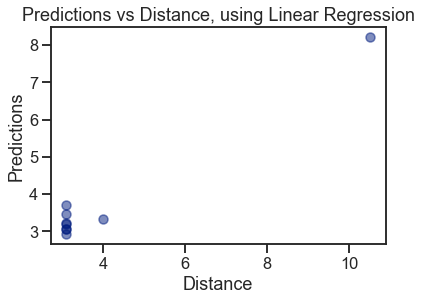

In [430]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.5)

ax.set(xlabel='Distance', 
       ylabel='Predictions',
       title='Predictions vs Distance, using Linear Regression');

# Machine Learning Foundation

## Section 2, Part c: Cross Validation 

In [431]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [433]:
# verify the shape of the array (rows by a single column)
X = df4.drop('Distance (mi)', axis=1)
y = df4['Distance (mi)']

In [434]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

In [435]:
for train_index, test_index in kf.split(X):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')

Train index: [ 1  2  5  7  8 10 11 12 13 14] 19
Test index: [ 0  3  4  6  9 15 17 23 24 25] 10

Train index: [ 0  1  3  4  5  6  8  9 10 15] 19
Test index: [ 2  7 11 12 13 14 16 21 26 28] 10

Train index: [ 0  2  3  4  6  7  9 11 12 13] 20
Test index: [ 1  5  8 10 18 19 20 22 27] 9



In [436]:
s = StandardScaler()
lr = LinearRegression()

In [437]:
estimator = Pipeline([("scaler", s),
                      ("regression", lr)])

In [438]:
kf

KFold(n_splits=3, random_state=72018, shuffle=True)

In [439]:
predictions = cross_val_predict(estimator, X, y, cv=kf)

In [440]:
r2_score(y, predictions)

0.9083001609562629

In [442]:
alphas = np.geomspace(1e-9, 1e0, num=10)
alphas

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

In [443]:
scores = []
coefs = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)

In [444]:
list(zip(alphas,scores))

[(1e-09, 0.9083001824833441),
 (1e-08, 0.9083003762187121),
 (1e-07, 0.9083023135583562),
 (1e-06, 0.908321680717966),
 (1e-05, 0.9085148065711428),
 (0.0001, 0.9103918400029889),
 (0.001, 0.9240933559550648),
 (0.01, 0.9184674831375859),
 (0.1, 0.8670161886669234),
 (1.0, 0.06044937657430982)]

In [446]:
np.mean(scores) # difference of .08

0.8222157603886394

In [447]:
Lasso(alpha=1e-6).fit(X, y).coef_

array([ 0.00623264, -0.06100874,  0.04129406,  0.00033944,  0.00102375])

In [448]:
Lasso(alpha=1.0).fit(X, y).coef_

array([-0.        , -0.02056545, -0.        ,  0.00043503,  0.00091236])

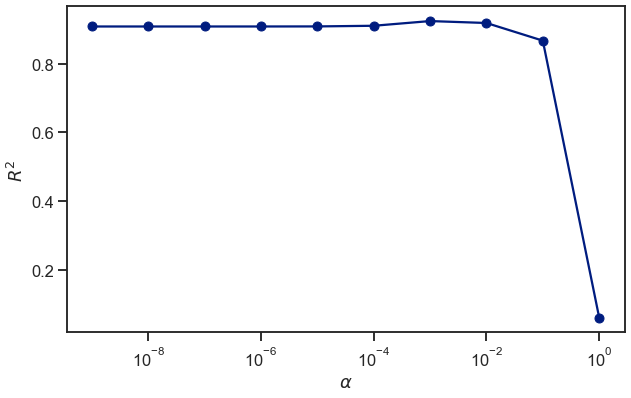

In [449]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [450]:
pf = PolynomialFeatures(degree=3)

scores = []
alphas = np.geomspace(0.06, 6.0, 20)
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)
    

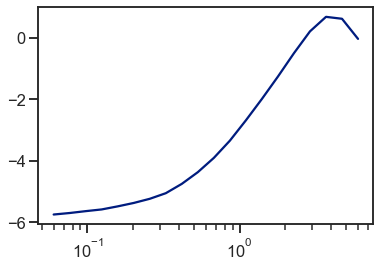

In [451]:
plt.semilogx(alphas, scores);

In [452]:
# Once we have found the hyperparameter (alpha~1e-2=0.01)
# make the model and train it on ALL the data
# Then release it into the wild .....
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.03))])

best_estimator.fit(X, y)
best_estimator.score(X, y)

0.9874606768821934

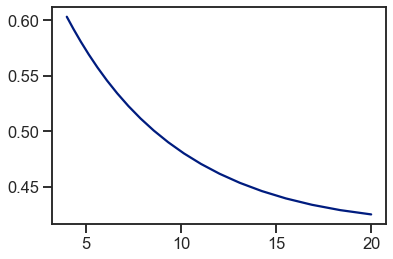

In [453]:
pf = PolynomialFeatures(degree=2)
alphas = np.geomspace(4, 20, 20)
scores=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    score = r2_score(y, predictions)
    scores.append(score)

plt.plot(alphas, scores)

In [454]:
# Once we have found the hyperparameter (alpha~1e-2=0.01)
# make the model and train it on ALL the data
# Then release it into the wild .....
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.03))])

best_estimator.fit(X, y)
best_estimator.score(X, y)

0.9874606768821934

In [455]:
df_importances = pd.DataFrame(zip(best_estimator.named_steps["make_higher_degree"].get_feature_names(),
                 best_estimator.named_steps["lasso_regression"].coef_,
))

In [456]:
col_names_dict = dict(zip(list(range(len(X.columns.values))), X.columns.values))

In [457]:
col_names_dict

{0: 'Activity Score',
 1: 'Average Heart Rate (bpm)',
 2: 'Max Heart Rate (bpm)',
 3: 'Steps_x',
 4: 'Calories'}

In [458]:
df_importances.sort_values(by=1)

,0,1
0,1,0.000000
18,x3^2,0.000000
...,...,...
20,x4^2,0.244688
4,x3,0.922694


In [459]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(4, 20, 30)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [460]:
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([ 4.        ,  4.22826702,  4.46956049,  4.7246238 ,  4.99424274,
        5.27924796,  5.58051751,  5.89897953,  6.23561514,  6.59146146,
        6.96761476,  7.36523392,  7.78554391,  8.22983963,  8.69948987,
        9.19594151,  9.72072404, 10.27545421, 10.86184103, 11.48169104,
       12.13691388, 12.82952815, 13.56166768, 14.33558803, 15.15367351,
       16.01844446, 16.93256509, 17.89885162, 18.92028098, 20.        ])})

In [461]:
grid.best_score_, grid.best_params_

(0.5115228393688039,
 {'polynomial_features__degree': 2, 'ridge_regression__alpha': 4.0})

In [462]:
y_predict = grid.predict(X)

In [463]:
# This includes both in-sample and out-of-sample
r2_score(y, y_predict)

0.9848200615353265

In [464]:
# Notice that "grid" is a fit object!
# We can use grid.predict(X_test) to get brand new predictions!
grid.best_estimator_.named_steps['ridge_regression'].coef_

array([ 0.        ,  0.27948941,  0.06824314,  0.16897282,  0.32040084,
        0.20233852, -0.04989112,  0.05442397,  0.10049527, -0.00867961,
        0.02613327, -0.04868343, -0.02221119,  0.07698463,  0.00493193,
        0.02119952,  0.12800157,  0.03329954,  0.03569207,  0.07547682,
        0.17164213])

In [465]:
grid.cv_results_

{'mean_fit_time': array([0.00278529, 0.00232697, 0.00199429, 0.00199485, 0.00265829,
        0.00199413, 0.0023272 , 0.00199374, 0.00166249, 0.00199477,
        0.00199811, 0.00132505, 0.00198746, 0.00198587, 0.00197419,
        0.00198078, 0.00265972, 0.00200446, 0.00266949, 0.00232585,
        0.00299319, 0.00199509, 0.00199477, 0.00232776, 0.00332475,
        0.00265948, 0.00199453, 0.00199477, 0.00232116, 0.0016706 ,
        0.00166766, 0.00198642, 0.00199382, 0.00198229, 0.00199461,
        0.00199461, 0.00166217, 0.00232728, 0.00199771, 0.00199453,
        0.00199469, 0.00199461, 0.00199485, 0.00199485, 0.00199477,
        0.00199509, 0.00199445, 0.00232697, 0.00199445, 0.00233968,
        0.00198293, 0.00232728, 0.00199485, 0.00265996, 0.00199469,
        0.00265996, 0.00232538, 0.00199461, 0.00166241, 0.00199469,
        0.00232744, 0.00199493, 0.00199477, 0.00233706, 0.00231576,
        0.00199445, 0.00199461, 0.00166241, 0.00199453, 0.00199493,
        0.00166241, 0.00199461,

NameError: name 'X_real' is not defined

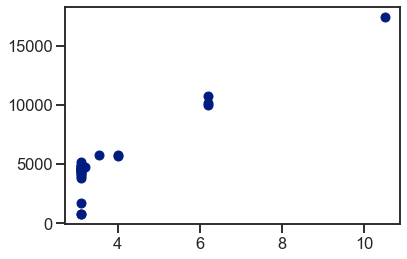

In [467]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Setup the polynomial features
degree = 20
pf = PolynomialFeatures(degree)
lr = LinearRegression()

# Extract the X- and Y- data from the dataframe 
X_data = df4[['Distance (mi)']]
Y_data = df4['Steps_x']

# Create the features and fit the model
X_poly = pf.fit_transform(X_data)
lr = lr.fit(X_poly, Y_data)
Y_pred = lr.predict(X_poly)

# Plot the result
plt.plot(X_data, Y_data, marker='o', ls='', label='data', alpha=1)
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, marker='^', alpha=.5, label='predictions w/ polynomial features')
plt.legend()
ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');


NameError: name 'X_real' is not defined

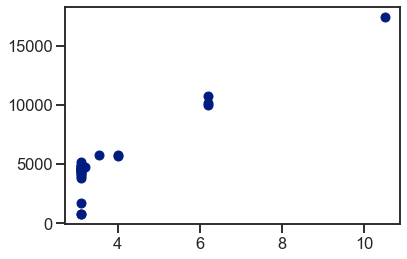

In [468]:
# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.linear_model import Ridge, Lasso

# The ridge regression model
rr = Ridge(alpha=0.001)
rr = rr.fit(X_poly, Y_data)
Y_pred_rr = rr.predict(X_poly)

# The lasso regression model
lassor = Lasso(alpha=0.0001)
lassor = lassor.fit(X_poly, Y_data)
Y_pred_lr = lassor.predict(X_poly)

# The plot of the predicted values
plt.plot(X_data, Y_data, marker='o', ls='', label='data')
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, label='linear regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_rr, label='ridge regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_lr, label='lasso regression', marker='^', alpha=.5)

plt.legend()

ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');

In [471]:
# let's look at the absolute value of coefficients for each model

coefficients = pd.DataFrame()
coefficients['linear regression'] = lr.coef_.ravel()
coefficients['ridge regression'] = rr.coef_.ravel()
coefficients['lasso regression'] = lassor.coef_.ravel()
coefficients = coefficients.applymap(abs)

coefficients.describe()  # Huge difference in scale between non-regularized vs regularized regression

,linear regression,ridge regression,lasso regression
count,2.100000e+01,21.000000,2.100000e+01
mean,2.075284e-05,1536.270503,1.117139e+02
std,3.553123e-05,2027.388251,5.056153e+02
min,0.000000e+00,0.000000,0.000000e+00
25%,1.263089e-08,11.504384,7.979250e-17
50%,5.062847e-07,372.556213,9.334863e-11
75%,2.534505e-05,2702.726847,2.507487e-05
max,1.102974e-04,6537.147594,2.318252e+03


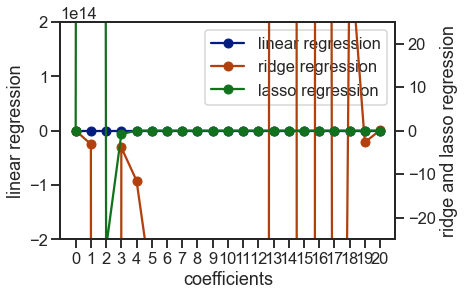

In [475]:
colors = sns.color_palette()

# Setup the dual y-axes
ax1 = plt.axes()
ax2 = ax1.twinx()

# Plot the linear regression data
ax1.plot(lr.coef_.ravel(), 
         color=colors[0], marker='o', label='linear regression')

# Plot the regularization data sets
ax2.plot(rr.coef_.ravel(), 
         color=colors[1], marker='o', label='ridge regression')

ax2.plot(lassor.coef_.ravel(), 
         color=colors[2], marker='o', label='lasso regression')

# Customize axes scales
ax1.set_ylim(-2e14, 2e14)
ax2.set_ylim(-25, 25
            )

# Combine the legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

ax1.set(xlabel='coefficients',ylabel='linear regression')
ax2.set(ylabel='ridge and lasso regression')

ax1.set_xticks(range(len(lr.coef_)));

In [476]:
from sklearn.metrics import mean_squared_error


def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [477]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

0.8344741358969263


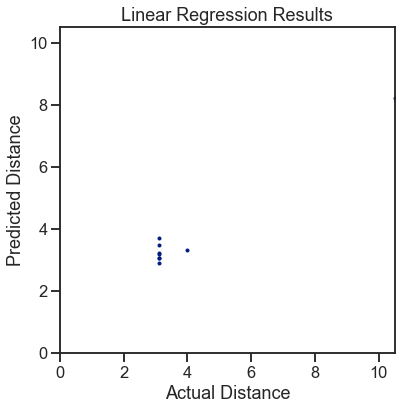

In [478]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Distance', 
       ylabel='Predicted Distance', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');

In [479]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

0.8344741358969263


In [480]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

print(ridgeCV.alpha_, ridgeCV_rmse)

80.0 0.7004584248131014


In [481]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_rmse)  # Lasso is slower

1e-05 0.8344612847505722


In [482]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_train, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

0.0005 0.1 0.8343825939762193


In [483]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,0.834474
Ridge,0.700458
Lasso,0.834461
ElasticNet,0.834383


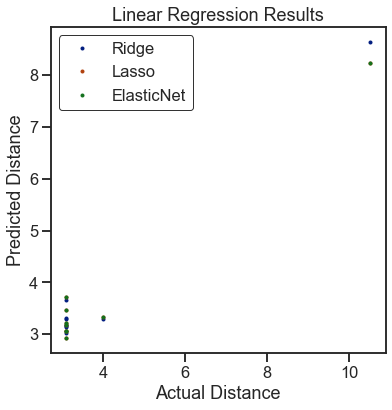

In [484]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Distance', 
       ylabel='Predicted Distance', 
       title='Linear Regression Results');

In [485]:
# Import SGDRegressor and prepare the parameters

from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD
Linear,0.834474,4.970086e+16
Ridge,0.700458,2.609541e+16
Lasso,0.834461,1.756696e+16
ElasticNet,0.834383,7.698516e+16


In [486]:
# Import SGDRegressor and prepare the parameters

from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(eta0=1e-7, **parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD-learningrate'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-learningrate
Linear,0.834474,4.970086e+16,0.374371
Ridge,0.700458,2.609541e+16,1.375852
Lasso,0.834461,1.756696e+16,0.302137
ElasticNet,0.834383,7.698516e+16,1.276698


In [487]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-learningrate,RMSE-SGD-scaled
Linear,0.834474,4.970086e+16,0.374371,1.404370
Ridge,0.700458,2.609541e+16,1.375852,2.408480
Lasso,0.834461,1.756696e+16,0.302137,1.404712
ElasticNet,0.834383,7.698516e+16,1.276698,1.413592


In [488]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-learningrate,RMSE-SGD-scaled
Linear,0.834474,4.970086e+16,0.374371,1.410799
Ridge,0.700458,2.609541e+16,1.375852,2.386107
Lasso,0.834461,1.756696e+16,0.302137,1.405349
ElasticNet,0.834383,7.698516e+16,1.276698,1.409259


In [489]:
### BEGIN SOLUTION
# Calculate the correlation values
feature_cols = df4.columns[:-1]
corr_values = df4[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

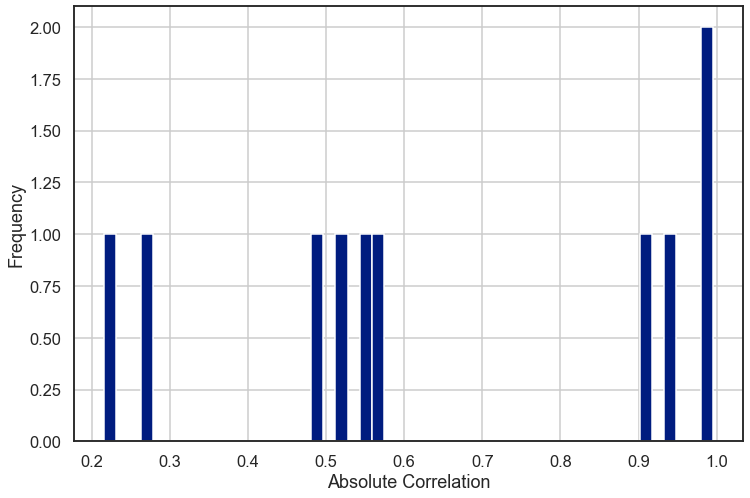

In [490]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [491]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')
### END SOLUTION

,feature1,feature2,correlation,abs_correlation
6,Activity Score,Steps_x,0.994868,0.994868
7,Average Heart Rate (bpm),Max Heart Rate (bpm),0.982828,0.982828
3,Distance (mi),Steps_x,0.937856,0.937856
0,Distance (mi),Activity Score,0.914642,0.914642


In [494]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df4['Distance (mi)'] = le.fit_transform(df4['Distance (mi)'])
df4['Distance (mi)'].sample(5)
### END SOLUTION

235    0
35     0
229    0
64     7
89     0
Name: Distance (mi), dtype: int64

In [495]:
### BEGIN SOLUTION
# Calculate the correlation values
feature_cols = df4.columns[:-1]
corr_values = df4[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

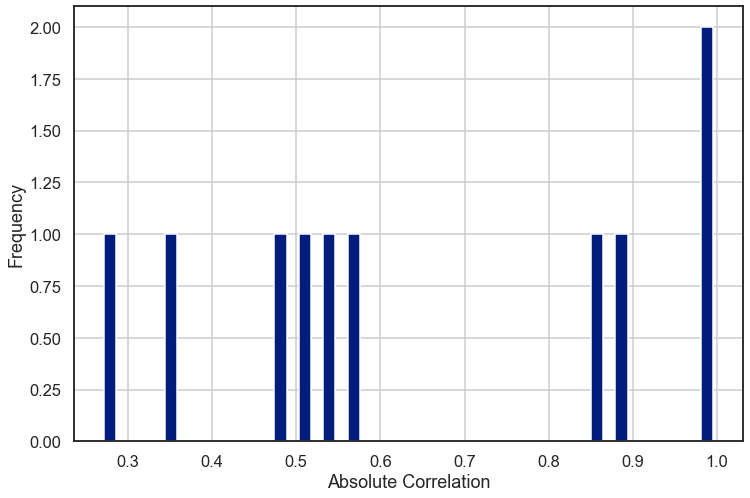

In [496]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [497]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')
### END SOLUTION

,feature1,feature2,correlation,abs_correlation
6,Activity Score,Steps_x,0.994868,0.994868
7,Average Heart Rate (bpm),Max Heart Rate (bpm),0.982828,0.982828
3,Distance (mi),Steps_x,0.885288,0.885288
0,Distance (mi),Activity Score,0.854128,0.854128
